# Capstone Project 2

## NYC TLC Trip Record Data

# Introduction

The New York City Taxi and Limousine Commission (TLC), created in 1971, is the agency responsible for licensing and regulating New York City's Medallion (Yellow) taxi cabs, for-hire vehicles (community-based liveries, black cars and luxury limousines), commuter vans, and paratransit vehicles.

Understanding passenger behavior and operational performance is crucial for enhancing service quality, optimizing operational efficiency, and increasing customer satisfaction. Insights derived from this analysis can guide strategic decisions in areas such as scheduling, pricing, marketing, and service improvements.

# Problem

In the taxi industry, understanding customer demand patterns, regional preferences, and factors influencing customer satisfaction (such as through tips) are key to optimizing operations and increasing profitability. By evaluating when and where services are most needed and what encourages customers to show extra appreciation, companies can make more informed decisions regarding resource allocation, pricing, and customer service initiatives.

# Goals

To provide insights to stakeholders to assist in strategies or decision-making related to the following:

- Understanding trip distribution based on time and location to Optimize taxi fleet distribution.

- Understanding customer behaviour and preferences to enhance customer loyalty and satisfaction.

- Identifying fare revenue to analyses to maximize revenue by adjusting the price.

- Identifying tip behaviours that encourage passenger to pay tips.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)
color = sns.color_palette("tab10")

# Data Specifications

## Main Data (NYC TLC Trip Dataset)
    1. VendorID:
    
A code indicating the LPEP provider that provided the record.
1 = Creative Mobile Technologies, LLC. 2 = VeriFone Inc
    
    2. pep_pickup_datetime:
    
The date and time when the meter was engaged.

    3. lpep_dropoff_datetime:
    
The date and time when the meter was disengaged

    4. Passenger_count:
    
The number of passengers in the vehicle.
This is a driver-entered value.

    5. Trip_distance:
The elapsed trip distance in miles was reported by the taximeter.

    6. PULocationID:
TLC Taxi Zone in which the taximeter was engaged.
    
    7. DOLocationID:
TLC Taxi Zone in which the taximeter was disengaged.
    
    8.RateCodeID:
The final rate code is in effect at the end of the trip.
1 = Standard rate
2 =JFK
3 =Newark
4 =Nassau or Westchester
5 =Negotiated fare
6 =Group ride
    
    9. Store_and_fwd_flag:
This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor,
aka “store and forward,” because the vehicle did
not have a connection to the server.
Y = store and forward trip
N = not a store and forward trip
    
    10. Payment_type:
A numeric code signifying how the passenger paid for the trip.
1 = Credit card
2 = Cash
3 = No charge
4 = Dispute
5 = Unknown
6 = Voided trip
    
    11. Fare_amount:
The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges.
Currently, this only includes the $0.50 and $1 rush
hour and overnight charges.

    12. Extra:
An additional charges. Currently, this only includes a surcharge of 0.5 dollars and 1 dollar for peak hours and late nights.
    
    13. MTA_tax:
$0.50 MTA tax that is automatically triggered based
on the metered rate in use
    
    14. Improvement_surcharge:
$0.30 improvement surcharge assessed on hailed trips at the flag
drop. The improvement surcharge began being
levied in 2015
    
    15. Tip_amount:
This field is automatically populated for credit card tips.Cash tips are not included.
    
    16.Tolls_amount:
The total amount of all tolls paid in the trip.
    
    17. Total_amount:
 The total amount charged to passengers. Does not include cash tips.
    
    18. Trip_type:
A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
1 = Street-hail
2 = Dispatch

    19. congestion_surcharge
A $2.75 congestion charge for yellow and green taxi rides in southern Manhattan from 96th St. This surcharge began in 2019.

## External Data

    (Taxi Zone Lookup)

This dataset is another dataset besides the main dataset that determines the location data corresponding to the location ID in the NYC TLC Trip Dataset.

## Load Dataset

In [2]:
# Load Dataset Trip
trip_df= pd.read_csv("../data/raw_data/NYC TLC Trip Record.csv")
# Load Dataset Location
location_df= pd.read_csv("../data/ext_data/taxi_zone_lookup.csv")

- We check the loaded dataset

In [3]:
display(trip_df.head(5), location_df.head(5))

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


- Now the two datasets will be merged based on the corresponding ID of each data.

- But before we merge it, we have to check null value on location_df first and save it into temporary data.

In [4]:
# Make copy from location df
location_td= location_df.copy()
# Check the null data
location_td.isna().sum()

LocationID      0
Borough         0
Zone            0
service_zone    0
dtype: int64

- Because there is no null value on location data so we just have to merge it with trip data now

In [5]:
# Merge trip data and location data
df= pd.merge(trip_df, location_td.add_prefix('PU'), left_on='PULocationID', right_on='PULocationID', how='left')
df= pd.merge(df, location_td.add_prefix('DO'), left_on='DOLocationID', right_on='DOLocationID', how='left')

print('Total data: ', len(df))
df.head()

Total data:  68211


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


- But after the merge there are some missing value on location data because the location ID is until 263, so beyond that the value is null

- So we gonna change it first to unknown to make sure the data of the location is not missing, and handling the unknown value later on the exploration

In [6]:
# Checking null value on location data
df[['PUBorough', 'PUZone', 'DOBorough', 'DOZone', 'DOservice_zone']].isna().sum()

PUBorough         201
PUZone            201
DOBorough         668
DOZone            668
DOservice_zone    668
dtype: int64

In [7]:
# Fill missing location data with unknown
df[['PUBorough', 'PUZone', 'PUservice_zone','DOBorough', 'DOZone', 'DOservice_zone']] = df[['PUBorough', 'PUZone', 'PUservice_zone','DOBorough', 'DOZone', 'DOservice_zone']].fillna('unknown')

In [8]:
# Checking null value on location data
df[['PUBorough', 'PUZone', 'DOBorough', 'DOZone', 'DOservice_zone']].isna().sum()

PUBorough         0
PUZone            0
DOBorough         0
DOZone            0
DOservice_zone    0
dtype: int64

- Checking the merged data

In [9]:
display(df.head(5), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


None

# Exploration Data Analysist (EDA)

An analysis approach that identifies general patterns in the data.

- First, checking the condition of the data with checking the duplicated value, null value, wrong datatype, and invalid data

In [10]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,VendorID,int64,0.000,0.000,0.000,0,2,"[2, 1]"
1,lpep_pickup_datetime,object,0.000,0.000,0.000,0,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,0.000,0.000,0.000,0,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,6.339,0.000,0.000,0,2,"[N, Y, nan]"
4,RatecodeID,float64,6.339,0.000,0.000,0,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,0.000,0.000,0.000,0,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,0.000,0.000,0.000,0,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,6.339,0.000,0.493,0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,0.000,0.000,4.911,0,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,0.000,0.258,0.122,0,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


- Based on the table above, there are several things that can be focused on in cleaning data

- Resolve missing data

- Resolve data type errors (There is data that is categorical but numeric)

- Resolve invalid data, especially in some numeric data (There are negative and zero values)

- But, first we checking the missing value by the heatmap

<Axes: >

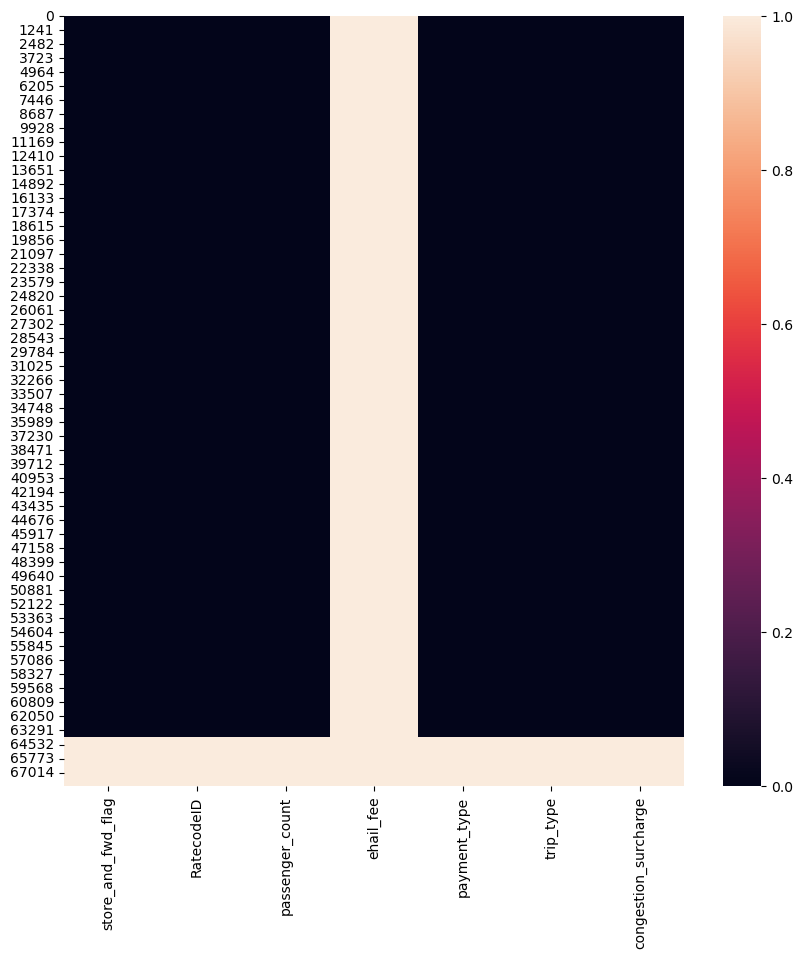

In [11]:
# Missing value heatmap
plt.figure(figsize=(10,10))
# Based missing value on certain column from table above
sns.heatmap(df[['store_and_fwd_flag','RatecodeID','passenger_count','ehail_fee','payment_type','trip_type','congestion_surcharge']].isna())

- Looking at the results of the graph above, the brightly colored value of 1 indicates the missing data.

- So looking at the results, it can be seen that the missing data is all data in the same row, except for the data in ehail_fee which has empty data in all rows.

- Checking for data distribution to identify outlier and correlation to help provide result for deciding the unnecesary feature

- I store the data into temporary data so that the original data remains unchanged in case there is an error in the exploration process.

In [12]:
# Saving df as temporary data
td=df.copy()

- Checking the statistical number of all the data in dataset

In [13]:
td.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


- Checking the data distribution by the boxplot for each numerical data only

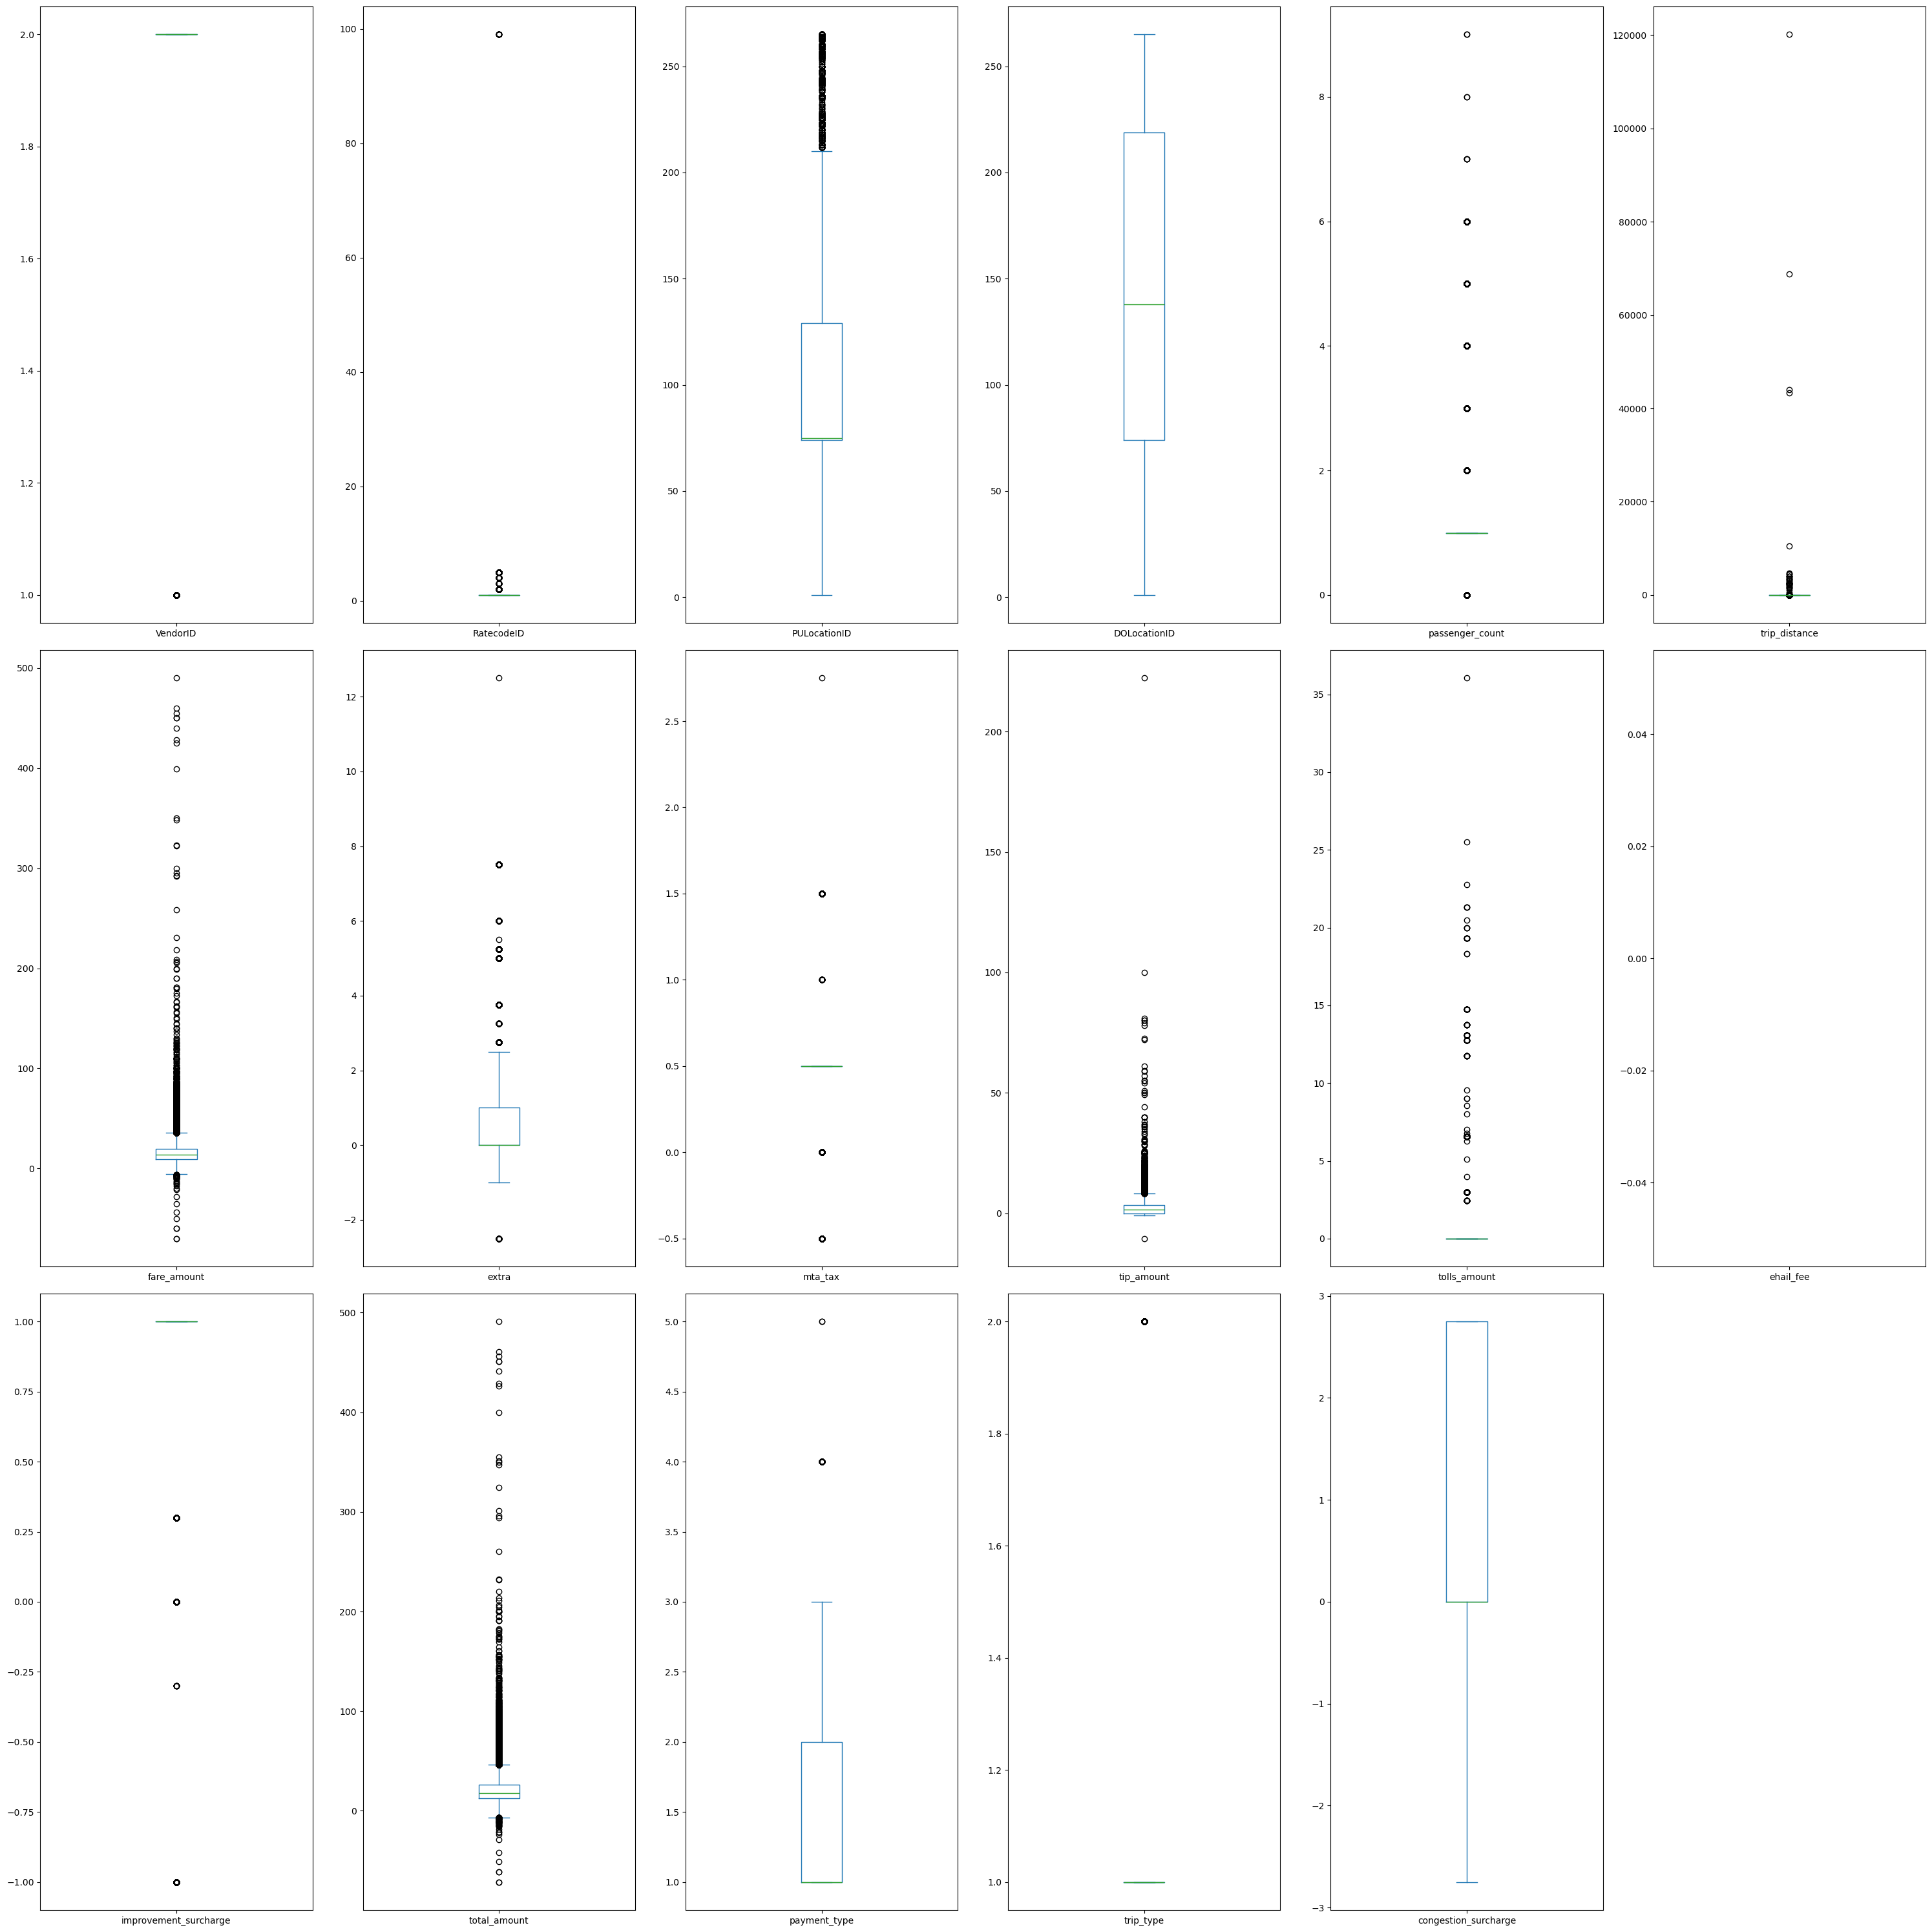

In [14]:
# Making pandas boxplot for each column in td
td.plot(
    kind='box', 
    subplots=True, 
    sharey=False,
    layout=(3, 6), 
    figsize=(30, 30)
)
 
# increase spacing between subplots

plt.tight_layout()
plt.show()

- Based on the boxplot results above, it can be seen that the data for each column is not normally distributed.

- And in each feature, there are many outliers.

- Checking data correlation (only numeric data) through heatmap

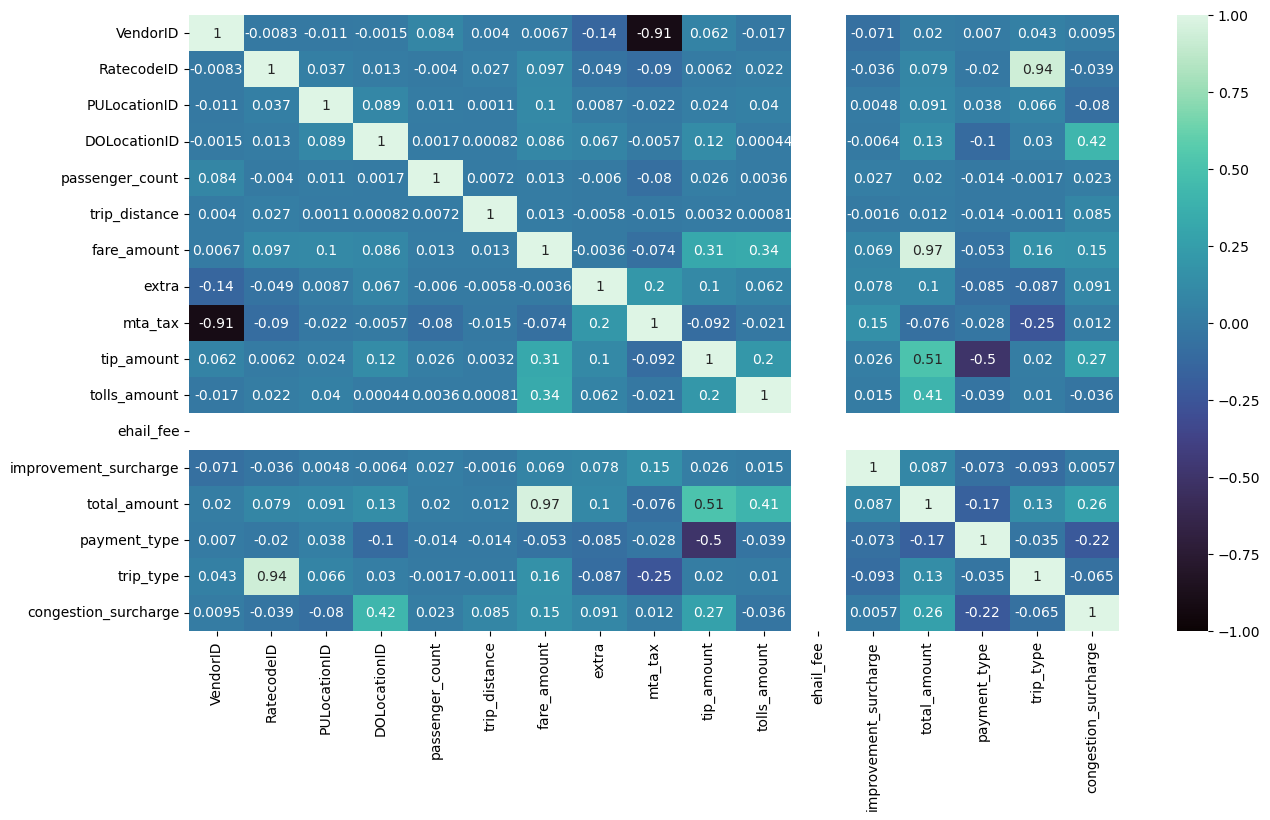

In [15]:
# Select only numeric columns (int and float)
td_numeric = td.select_dtypes(include=['int', 'float'])

cmap = sns.color_palette("mako", as_cmap=True)
plt.figure(figsize=(15,8))
sns.heatmap(td_numeric.corr(), 
            vmin=-1, vmax=1, annot=True, cmap=cmap)
plt.show()

- Based on the results of the correlation data heatmap above, there is some data that will be dropped for further data processing.

- The following data features will be dropped:

-----    

    VendorID

Although it is categorical data, in reality we don't need this VendorID in the data analysis goals.

    extra

Besides showing a weak data correlation with every other feature, this extra feature is also not needed in the data analysis goals.

    mta_tax

Besides showing a weak data correlation, mta_tax is also just a tax data where the data content is the same so it is not needed in the data analysis.

    tolls_amount

Although it shows a data correlation with fare_amount, tolls_amount is not needed in the analysis data goals.

    ehail_fee

There is no data on ehail_fee

    improvement_surcharge

Besides showing a weak data correlation with every other feature, this surcharge feature is also not needed in the analysis data goals.

    total_amount

Although it shows a data correlation with fare_amount, total_amount is not needed in the data analysis goals.

    congestion_surcharge

Besides showing a weak data correlation with every other feature, this surcharge feature is also not needed in the data analysis goals.

    PU and DO Service_zone

There is no correlation with the data because it is categorical data, but because only Zone and Borough data is needed for this analysis.

- Dropping unnecesary feature

In [16]:
# dropping feature
td.drop(['VendorID', 'store_and_fwd_flag', 'ehail_fee', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'total_amount', 'PUservice_zone', 'DOservice_zone'], axis=1, inplace=True)

td.head(5)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,4.03,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,2.64,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.2,1.94,1.0,1.0,Queens,Steinway,Queens,Old Astoria
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,1.70,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North


# Data Cleaning

The process of fixing or removing inaccurate, incomplete, or irrelevant data from a dataset that we already identified above

## Duplicated Values Removal

In [17]:
df[df.duplicated()].sum()

VendorID                   0
lpep_pickup_datetime       0
lpep_dropoff_datetime      0
store_and_fwd_flag         0
RatecodeID               0.0
PULocationID               0
DOLocationID               0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
ehail_fee                0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
PUBorough                  0
PUZone                     0
PUservice_zone             0
DOBorough                  0
DOZone                     0
DOservice_zone             0
dtype: object

- In the result above, at first glance, it looks like there is no duplicated data in the entire data feature.

- However, we can try to see the duplicated data in only a few features

- The features that we will take here are data that can affect the fare or tip value. So the feature is a date to distance feature

In [18]:
# Make duplicated by subset data
duplicated_td = td[td.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
duplicated_td

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
662,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
663,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,-3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
899,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,-8.6,0.0,3.0,1.0,Queens,Jackson Heights,Queens,Elmhurst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1.0,0.00,2.5,0.0,3.0,1.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,-3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63808,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63868,2023-01-31 23:44:44,2023-01-31 23:45:15,5.0,264,264,1.0,0.00,-10.0,0.0,4.0,2.0,unknown,unknown,unknown,unknown


- From the results above, it can be seen that there is duplicated data, it's just that the duplicated data on fare_amount is a negative value so that when duplicate data is checked for all data features, it is not detected.

- So we need to eliminate this duplicated data so that in the negative data process we only need to convert it into positive data.

In [19]:
# negative only duplicated data
neg_duplicated_td=duplicated_td[duplicated_td['fare_amount']<0]
print('Total duplicated data: ', len(neg_duplicated_td))

neg_duplicated_td

Total duplicated data:  171


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
662,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,-3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,-8.6,0.0,3.0,1.0,Queens,Jackson Heights,Queens,Elmhurst
1686,2023-01-02 12:56:53,2023-01-02 13:00:10,1.0,75,75,1.0,0.77,-4.5,0.0,4.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
1864,2023-01-02 13:51:33,2023-01-02 13:52:42,1.0,75,75,2.0,0.08,-3.7,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2023-01-31 18:39:16,2023-01-31 18:39:29,1.0,130,130,3.0,0.05,-3.0,0.0,4.0,1.0,Queens,Jamaica,Queens,Jamaica
63544,2023-01-31 19:06:18,2023-01-31 19:06:46,1.0,75,75,2.0,0.08,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
63655,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1.0,0.00,-2.5,0.0,3.0,1.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,-3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)


- Drop the duplicated data

In [20]:
# drop duplicated data by index from neg_duplicated_td
td.drop(neg_duplicated_td.index, inplace=True)

In [21]:
td[td.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'])][duplicated_td['fare_amount']<0]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


## Negative Values Removal

In [22]:
pd.DataFrame({
    'feature': td.columns.values,
    'neg_value(%)': [len(td[col][td[col] < 0]) / len(td) * 100 if np.issubdtype(td[col].dtype, np.number) else 0 for col in td.columns]
}).round(3)

,feature,neg_value(%)
0,lpep_pickup_datetime,0.000
1,lpep_dropoff_datetime,0.000
2,RatecodeID,0.000
3,PULocationID,0.000
4,DOLocationID,0.000
5,passenger_count,0.000
6,trip_distance,0.000
7,fare_amount,0.007
8,tip_amount,0.000
9,payment_type,0.000


- In the results above there are negative values in fare_amount

- Before that find the negative values, So we can change it into positive values

In [23]:
neg_fare_td= td[td['fare_amount']<0]
print('Total negative values: ', len(neg_fare_td))

neg_fare_td

Total negative values:  5


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
64376,2023-01-04 15:11:00,2023-01-04 15:12:00,NaN,25,25,NaN,0.13,-27.96,3.00,NaN,NaN,Brooklyn,Boerum Hill,Brooklyn,Boerum Hill
64487,2023-01-05 10:51:00,2023-01-05 11:20:00,NaN,116,151,NaN,2.22,-43.54,0.76,NaN,NaN,Manhattan,Hamilton Heights,Manhattan,Manhattan Valley
65108,2023-01-10 10:00:00,2023-01-10 10:26:00,NaN,168,159,NaN,3.45,-17.38,0.26,NaN,NaN,Bronx,Mott Haven/Port Morris,Bronx,Melrose South
66459,2023-01-19 17:48:00,2023-01-19 17:52:00,NaN,166,166,NaN,0.38,-35.01,4.86,NaN,NaN,Manhattan,Morningside Heights,Manhattan,Morningside Heights
67461,2023-01-26 10:10:00,2023-01-26 10:20:00,NaN,248,126,NaN,1.51,-15.53,0.22,NaN,NaN,Bronx,West Farms/Bronx River,Bronx,Hunts Point


- Change the negative values into positive values using absolute function

In [24]:
td.loc[neg_fare_td.index, 'fare_amount'] = td['fare_amount'].abs()

In [25]:
neg_fare_td= td[td['fare_amount']<0]
print('Total negative values: ', len(neg_fare_td))

Total negative values:  0


## Zero Values Removal

In [26]:
pd.DataFrame({
    'feature': td.columns.values,
    'data_type': td.dtypes.values,
    '0_value(%)': [len(td[col][td[col] == 0]) / len(td) * 100 if np.issubdtype(td[col].dtype, np.number) else 0 for col in td.columns]
}).round(3)

,feature,data_type,0_value(%)
0,lpep_pickup_datetime,object,0.000
1,lpep_dropoff_datetime,object,0.000
2,RatecodeID,float64,0.000
3,PULocationID,int64,0.000
4,DOLocationID,int64,0.000
5,passenger_count,float64,0.494
6,trip_distance,float64,4.822
7,fare_amount,float64,0.122
8,tip_amount,float64,42.119
9,payment_type,float64,0.000


- From the results above, the data feature that can only have a value of 0 is only tip_amount because there are cases where passengers do not tip the driver.

- In addition, there are features that need to be removed from the 0 value

- passenger_count cannot have a value of 0 because it does not allow transactions to occur without passengers so the data will be replaced with the median value (the use of the median value is due to the abnormal distribution of the previous data).

- while for trip_distance and fare_amount also cannot have a value of 0 because it does not allow transactions to occur without the distance traveled or the fare price paid, so it only needs to add domain knowledge above 0.

In [27]:
# Replace 0 value into median values
td['passenger_count'] = td['passenger_count'].replace(0, td['passenger_count'].median())
# dropping data with trip_distance or fare_amount = 0
td = td[td['trip_distance']>0]
td = td[td['fare_amount']>0]

In [28]:
pd.DataFrame({
    'feature': td.columns.values,
    'data_type': td.dtypes.values,
    '0_value(%)': [len(td[col][td[col] == 0]) / len(td) * 100 if np.issubdtype(td[col].dtype, np.number) else 0 for col in td.columns]
}).round(3)

,feature,data_type,0_value(%)
0,lpep_pickup_datetime,object,0.000
1,lpep_dropoff_datetime,object,0.000
2,RatecodeID,float64,0.000
3,PULocationID,int64,0.000
4,DOLocationID,int64,0.000
5,passenger_count,float64,0.000
6,trip_distance,float64,0.000
7,fare_amount,float64,0.000
8,tip_amount,float64,40.431
9,payment_type,float64,0.000


## Missing Values Removal

In [29]:
pd.DataFrame({
    'feature': td.columns.values,
    'data_type': td.dtypes.values,
    'null_value(%)': td.isna().mean().values * 100
}).round(3)

,feature,data_type,null_value(%)
0,lpep_pickup_datetime,object,0.000
1,lpep_dropoff_datetime,object,0.000
2,RatecodeID,float64,6.443
3,PULocationID,int64,0.000
4,DOLocationID,int64,0.000
5,passenger_count,float64,6.443
6,trip_distance,float64,0.000
7,fare_amount,float64,0.000
8,tip_amount,float64,0.000
9,payment_type,float64,6.443


- The first missing value in the data feature above is RatecodeID data, where this data is the rate that affects the end of the trip.

- Based on https://www.nyc.gov/site/tlc/passengers/taxi-fare.page, This feature contains:
------
    1 = Standard rate

 End trip is still within City limits.

    2 =JFK

Traveling between Manhattan and John F. Kennedy Airport (JFK) in both directions, the on-screen fare message should read `“Rate #2- JFK Airport”

    3 =Newark

Travel to Newark Airport (EWR)

    4 =Nassau or Westchester

Once the taxi goes beyond the City limits to Nassau or Westchester

    5 =Negotiated fare

Other Points Outside the City.

    6 =Group ride

### RatecodeID

In [30]:
# Value counts on RatecodeID
td['RatecodeID'].value_counts()

RatecodeID
1.0     59400
5.0       955
2.0       131
4.0        53
3.0        20
99.0       10
Name: count, dtype: int64

- We will check the data related to nassau or westchester data (RatecodeID=4) because this data is data that includes trip data outside new york so it has the potential to be dropped.

In [31]:
# Check the borough data with Ratecode 4
td[td['RatecodeID']==4][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough
Queens     unknown      37
Manhattan  unknown       7
Bronx      unknown       2
Manhattan  Manhattan     2
unknown    unknown       2
Brooklyn   unknown       1
Manhattan  EWR           1
unknown    Queens        1
Name: count, dtype: int64

- We gonna change the DOBorough in EWR to the correct RatecodeID, which is 3

In [32]:
# Change RatecodeID into 3
td.loc[(td['RatecodeID']==4) & (td['DOBorough']=='EWR'), 'RatecodeID'] = 3

- We gonna change the data that is not unknown into RatecodeID=1 because we assume it is still standard fare

In [33]:
td.loc[(td['RatecodeID']==4) & (td['PUBorough']!='unknown') & (td['DOBorough']!='unknown'), 'RatecodeID'] = 1

In [34]:
# Check the borough data with Ratecode 4
td[td['RatecodeID']==4][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough
Queens     unknown      37
Manhattan  unknown       7
Bronx      unknown       2
unknown    unknown       2
Brooklyn   unknown       1
unknown    Queens        1
Name: count, dtype: int64

- Now there is only unknown data left, so we can drop the data because it does not enter the coverage area in New York

In [35]:
# drop data
td.drop(td[td['PUBorough']=='unknown'].index, inplace=True)
td.drop(td[td['DOBorough']=='unknown'].index, inplace=True)

In [36]:
# check null data
print('Missing value: ',td['RatecodeID'].isna().sum())

# Value counts on RatecodeID
td['RatecodeID'].value_counts()

Missing value:  4153


RatecodeID
1.0     59207
5.0       878
2.0       129
3.0        15
99.0        9
Name: count, dtype: int64

- Fix invalid data on RatecodeID where there is an ID 99 that is not listed in any category.

In [37]:
# Replace data id 99 as nan
td['RatecodeID'] = td['RatecodeID'].replace(99, np.nan)

# check null data
print('Missing value: ',td['RatecodeID'].isna().sum())

# Value counts on RatecodeID
td['RatecodeID'].value_counts()

Missing value:  4162


RatecodeID
1.0    59207
5.0      878
2.0      129
3.0       15
Name: count, dtype: int64

- For data that shows manhattan then we will check the Zone on each Pickup and Dropoff.

- So if we check that the zone at that location is at JFK Airport then we can classify it into RatecodeID = 2

- And it same as if the DOZone is on Newark Airport then the correct output should be RatecodeID = 3

- Except for all of that, it should be RatecodeID=1 because we assume it stil categorized as standard fare

In [38]:
# Correct output for RatecodeID 2
td.loc[(td['PUBorough']=='Manhattan') & (td['DOZone']=='JFK Airport') & (td['RatecodeID'].isna()), 'RatecodeID'] = 2
td.loc[(td['PUZone']=='JFK Airport') & (td['DOBorough']=='Manhattan') & (td['RatecodeID'].isna()), 'RatecodeID'] = 2
# Correct output for RatecodeID 3
td.loc[(td['DOZone']=='Newark Airport') & (td['RatecodeID'].isna()), 'RatecodeID'] = 3
# Correct output for RatecodeID 1
td['RatecodeID'].fillna(1, inplace=True)

In [39]:
# check null data
print('Missing value: ',td['RatecodeID'].isna().sum())

# Value counts on RatecodeID
td['RatecodeID'].value_counts()

Missing value:  0


RatecodeID
1.0    63327
5.0      878
2.0      170
3.0       16
Name: count, dtype: int64

### passenger_count

In [40]:
# check null data
print('Missing value: ',td['passenger_count'].isna().sum())

# Value counts on RatecodeID
td['passenger_count'].value_counts()

Missing value:  4153


passenger_count
1.0    51333
2.0     4870
5.0     1746
6.0     1033
3.0      897
4.0      356
7.0        2
8.0        1
Name: count, dtype: int64

- Because the data distribution of the passenger_count is not normal so we just gonna fill it with median value

In [41]:
td['passenger_count'].median()

1.0

- So the nan value gonna fill with 1 value

In [42]:
# Fill nan value with median value
td['passenger_count'] = td['passenger_count'].fillna(td['passenger_count'].median())


In [43]:
# check null data
print('Missing value: ',td['passenger_count'].isna().sum())

# Value counts on RatecodeID
td['passenger_count'].value_counts()

Missing value:  0


passenger_count
1.0    55486
2.0     4870
5.0     1746
6.0     1033
3.0      897
4.0      356
7.0        2
8.0        1
Name: count, dtype: int64

### payment_type

1 = Credit card

2 = Cash

3 = No charge

4 = Dispute

5 = Unknown

6 = Voided trip

In [44]:
# check null data
print('Missing value: ',td['payment_type'].isna().sum())

# Value counts on RatecodeID
td['payment_type'].value_counts()

Missing value:  4153


payment_type
1.0    38278
2.0    21690
3.0      221
4.0       49
Name: count, dtype: int64

- From what we know that tips only exist for credit cards so for trip records that are detected to give tips (tip > 0) then the payment method used is using a credit card.

- So fill the other missing values temporarily with unknown 


- First we check the payment type that give a tip

In [45]:
td[(td['tip_amount']>0)]['payment_type'].value_counts()

payment_type
1.0    34706
2.0        1
Name: count, dtype: int64

- We gonna change all transaction that give a tip into payment_type = 1

In [46]:
# Change value into payment type = 1
td.loc[(td['tip_amount']>0) & (td['payment_type']==2), 'payment_type'] = 1
# Check value
td[(td['tip_amount']>0)]['payment_type'].value_counts()

payment_type
1.0    34707
Name: count, dtype: int64

- So for the rest null value, we gonna change it into unknown which is type 5

In [47]:
# Fill null value if tip > 0 then 1, else is 5
td.loc[td['payment_type'].isna(), 'payment_type'] = td['tip_amount'].apply(lambda x: 1.0 if x > 0.0 else 5.0)
# Check value
td['payment_type'].value_counts()

payment_type
1.0    41994
2.0    21689
5.0      438
3.0      221
4.0       49
Name: count, dtype: int64

### trip_type

1 = Street-hail

2 = Dispatch

In [48]:
# check null data
print('Missing value: ',td['trip_type'].isna().sum())

# Value counts on RatecodeID
td['trip_type'].value_counts()

Missing value:  4162


trip_type
1.0    59460
2.0      769
Name: count, dtype: int64

- From correlation heatmap at beginning, we seen that trip_type has strong correlation with RatecodeID, so we try to check again the correlation below

In [49]:
# Show correlation value between trip type and RatecodeID
print("Correlation: ", td['trip_type'].corr(td['RatecodeID']))

Correlation:  0.926247451368171


- it showed 0.93, so it has strong correlation between those two then we will check the data 

In [50]:
# Showing data group by RatecodeID and trip type
rate_trip_td= td.groupby(['RatecodeID', 'trip_type']).agg(total=('trip_type', 'count')).reset_index()

rate_trip_td

,RatecodeID,trip_type,total
0,1.0,1.0,59205
1,1.0,2.0,2
2,2.0,1.0,129
3,3.0,1.0,15
4,5.0,1.0,111
5,5.0,2.0,767


In [51]:
# Calculate total count for each RatecodeID
total_counts = rate_trip_td.groupby('RatecodeID')['total'].transform('sum')

# Add percentage for each trip_type within each RatecodeID
rate_trip_td['percentage'] = (rate_trip_td['total'] / total_counts) * 100

rate_trip_td

,RatecodeID,trip_type,total,percentage
0,1.0,1.0,59205,99.996622
1,1.0,2.0,2,0.003378
2,2.0,1.0,129,100.000000
3,3.0,1.0,15,100.000000
4,5.0,1.0,111,12.642369
5,5.0,2.0,767,87.357631


- Based on information from the dataset dataset that 

RatecodeID = 1, 99% have trip_type with value 1,

Ratecode 2 and 3 100% trip_type 1 

Ratecode 5, 87% have trip_type 2

- Then fill the missing value in the trip_type feature for Ratecode 1-4 with a value of 1

- And fill the missing value in the trip_type feature for Ratecode 5 with a value of 2


- Checking the null values too

In [52]:
td[td['trip_type'].isna()].groupby('RatecodeID').agg(total=('RatecodeID', 'count'))

,total
RatecodeID,
1.0,4120
2.0,41
3.0,1


- Because the missing value is only on 1-3 value, so we just fill all missing value with trip_type 1

In [53]:
td['trip_type']= td['trip_type'].fillna(1)
td['trip_type'].value_counts()

trip_type
1.0    63622
2.0      769
Name: count, dtype: int64

### Checking all the data


- After we already remove all the missing value, we checked again the missing value by the heatmap like on the beginning

<Axes: >

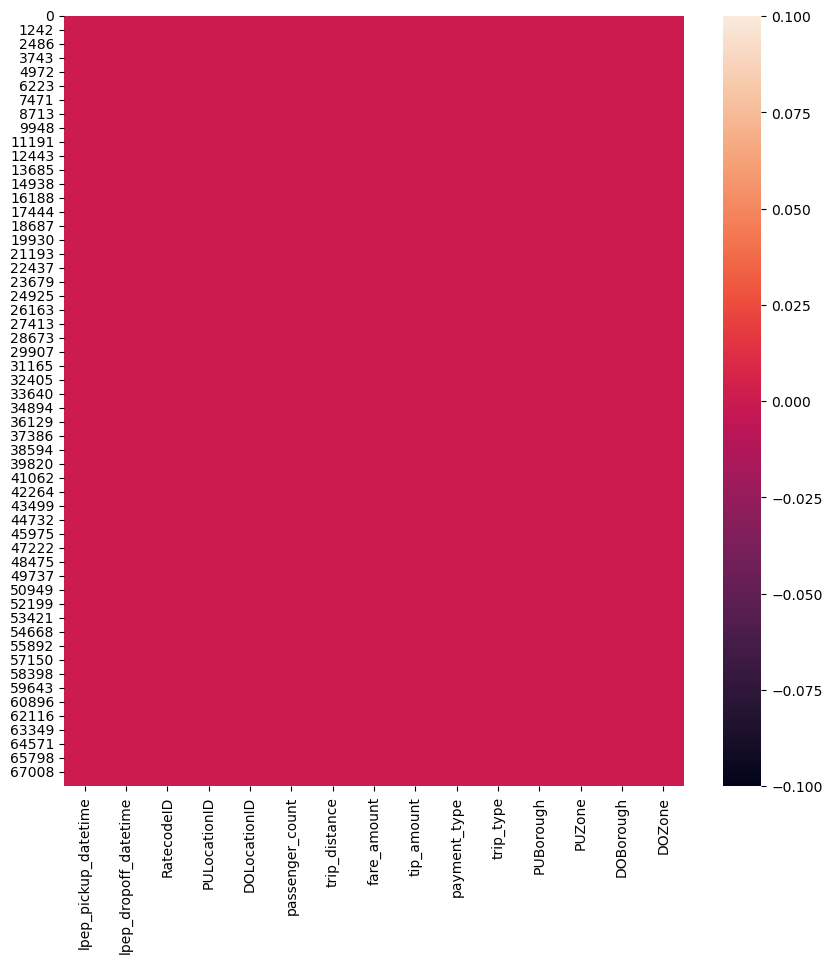

In [54]:
# Missing value heatmap
plt.figure(figsize=(10,10))
# Based missing value on certain column from table above
sns.heatmap(td.isna())

- The heatmap show 0 for all of data, so we clear all the missing value

# Formatting data and Handling Outliers

Handling outliers with feature engineering

### Pickup and Dropoff Date Time

- Change the data type of Date Time from object to datetime

In [55]:
td['lpep_pickup_datetime'] = pd.to_datetime(td['lpep_pickup_datetime'])
td['lpep_dropoff_datetime'] = pd.to_datetime(td['lpep_dropoff_datetime'])

td.head(5)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,4.03,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,2.64,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,1.70,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North
5,2023-01-01 00:53:31,2023-01-01 01:11:04,1.0,41,262,1.0,2.78,17.7,0.00,2.0,1.0,Manhattan,Central Harlem,Manhattan,Yorkville East


- Because this data is only in january 2023 so we have to make sure all of the date is in january 2023

In [56]:
# Define outlier for date (month <> 1 and year <> 2023)
date_outliers = td[(td['lpep_pickup_datetime'].dt.month!=1) | (td['lpep_pickup_datetime'].dt.year!=2023)]

print('Total outliers: ', len(date_outliers))
date_outliers

Total outliers:  4


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
298,2022-12-09 14:10:49,2022-12-09 14:22:26,1.0,7,56,1.0,5.37,16.0,0.00,2.0,1.0,Queens,Astoria,Queens,Corona
318,2022-12-09 14:55:42,2022-12-09 15:33:06,1.0,260,164,1.0,5.48,25.5,0.00,2.0,1.0,Queens,Woodside,Manhattan,Midtown South
17874,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,65,178,1.0,7.72,34.5,7.20,1.0,1.0,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South
25100,2023-02-01 03:10:05,2023-02-01 03:40:35,5.0,82,198,2.0,4.58,28.0,5.66,1.0,2.0,Queens,Elmhurst,Queens,Ridgewood


- There are 4 outlier on this date feature, so we gonna drop the outliers

In [57]:
td.drop(date_outliers.index, inplace=True)

In [58]:
td[(td['lpep_pickup_datetime'].dt.month!=1) | (td['lpep_pickup_datetime'].dt.year!=2023)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


#### Time and date feature engineering

- To make the analysis easier and overcome outliers, a new feature was added to categorize the time.


- Make it categorize by time description (morning, afternoon, evening, late night)


In [59]:
# time zone function
def time_zone(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,22):
        return 'Evening'
    else:
        return 'Late Night'

td['time_zone'] = td['lpep_pickup_datetime'].dt.hour.apply(time_zone)


- Make it categorize as weekday and weekend

In [60]:
# Categorize it by day name
td['day_type'] = td['lpep_pickup_datetime'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

In [61]:
td[['lpep_pickup_datetime', 'time_zone', 'day_type']].head(5)

,lpep_pickup_datetime,time_zone,day_type
0,2023-01-01 00:26:10,Late Night,Weekend
1,2023-01-01 00:51:03,Late Night,Weekend
3,2023-01-01 00:13:14,Late Night,Weekend
4,2023-01-01 00:33:04,Late Night,Weekend
5,2023-01-01 00:53:31,Late Night,Weekend


### RatecodeID

#### Feature engineering

In [62]:
td['RatecodeID'].value_counts()

RatecodeID
1.0    63324
5.0      877
2.0      170
3.0       16
Name: count, dtype: int64

- There are no outliers but we can do feature engineering for labeling the ID with true meaning

In [63]:
td['RatecodeID'] = td['RatecodeID'].replace({1:'Standard rate', 2:'JFK Airport', 3:'Newark Airport', 4:'Nassau or Westchester', 5:'Negotiated fare', 6:'Group ride'})
td['RatecodeID'].value_counts()

RatecodeID
Standard rate      63324
Negotiated fare      877
JFK Airport          170
Newark Airport        16
Name: count, dtype: int64

### passenger_count

In [64]:
df['passenger_count'].value_counts()

passenger_count
1.0    54299
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

- Based on the regulation https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page

- The maximum number of passengers allowed in a taxi is 4 or 5 passengers (An additional passengers must be accepted if the passenger is under seven (7) years old and is carried on the lap of an adult passenger sitting in the back)

- So we categorized it by 1-4 and >4 category for passenger count

In [65]:
td['passenger_count'] = td['passenger_count'].apply(lambda x: '>4' if x>4 else str(x))
td['passenger_count'].value_counts()

passenger_count
1.0    55483
2.0     4869
>4      2782
3.0      897
4.0      356
Name: count, dtype: int64

### Trip Distance

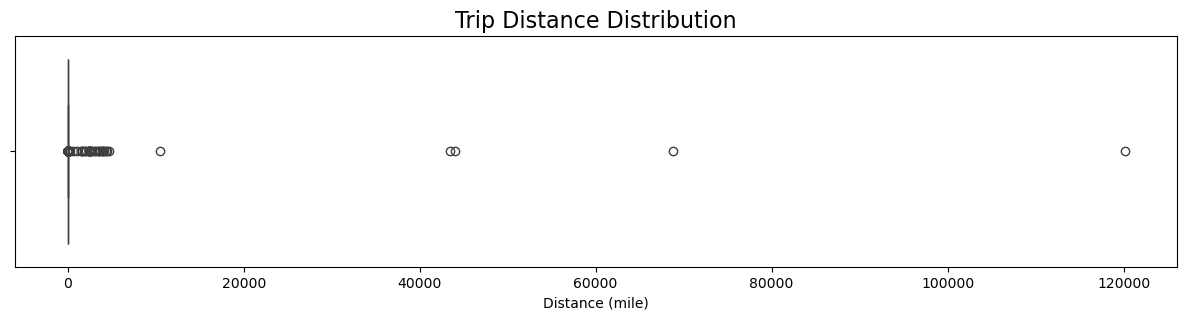

In [66]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=td, x='trip_distance', color=color[0])
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distribution', fontsize=16)

plt.show()

- Assuming that taxis that travel less than 1 km (0.62 miles) are unnatural records or failed records such as the possibility of passengers or drivers canceling orders, then data that have these values will be dropped

- Checking distance trip less than 0.62 mile

In [67]:
print('Total distance trip with less than 1 Km (0.62 miles):', len(td[td['trip_distance']<0.62]))
td = td[td['trip_distance']>0.62]

Total distance trip with less than 1 Km (0.62 miles): 3465


- Because we dont have any data less than 1 Km than we can proceed to checking for high outliers

- We can check for the high outliers by sorting the values

In [68]:
# Checking for top 10 highest trip distance
td[['trip_distance','fare_amount']].sort_values('trip_distance', ascending=False).head(10)

,trip_distance,fare_amount
65194,120098.84,46.82
67926,68796.82,24.90
66581,44003.31,26.33
64609,43392.12,12.02
65846,10480.36,20.01
67415,4707.37,13.60
66713,4502.86,26.20
66452,4389.24,12.30
68206,4070.82,15.70
66842,3981.90,18.75


- From result above we seen that the highest distance possible is < 50 miles, so we have to remove outliers that has value > 50 miles

In [69]:
# Showing outliers
distance_outliers= td[td['trip_distance']>50][['PULocationID', 'DOLocationID', 'trip_distance']]


print("Total Outliers: ", len(distance_outliers))
distance_outliers

Total Outliers:  38


,PULocationID,DOLocationID,trip_distance
7322,134,134,66.18
33373,82,236,1571.97
63995,181,137,579.63
64446,193,140,2555.47
64558,49,65,3077.89
64572,193,193,2606.52
64609,41,74,43392.12
64695,82,130,137.95
64947,52,79,2446.53
64954,119,20,2027.31


- We will try to change value for extreme outliers data above with the central tendency (median) value of trip_distance for each departure and stop point in the existing records in the dataset.

- So we count the median value for each trip_distance group by locationID

- We make another sample data to keep the value

In [70]:
# Aggregation by LocationID
desc_distance_byid = td[td['trip_distance']<50].groupby(['PULocationID', 'DOLocationID']).agg(count=('trip_distance', 'count'),
                                                                                            avg_distance=('trip_distance', 'mean'),
                                                                                            median_distance=('trip_distance', 'median')).reset_index()
# Making sample data
desc_distance_byid.sample(7, random_state=3)

,PULocationID,DOLocationID,count,avg_distance,median_distance
4180,220,127,2,8.5950,8.595
1947,80,87,2,6.5800,6.580
4548,244,92,1,13.2200,13.220
4112,212,248,1,0.6600,0.660
737,41,120,4,2.7625,2.775
3833,189,17,2,1.6900,1.690
285,25,24,2,11.2100,11.210


In [71]:
# Merge data outliers and new data
distance_byid = pd.merge(distance_outliers, desc_distance_byid, on=['PULocationID', 'DOLocationID'], how='left')
distance_byid.drop(columns='count', axis=1, inplace=True)
distance_byid.index = distance_outliers.index

print('Merged Data: ')
display(distance_byid.head(5))

Merged Data: 


,PULocationID,DOLocationID,trip_distance,avg_distance,median_distance
7322,134,134,66.18,1.129205,0.910
33373,82,236,1571.97,8.023333,8.080
63995,181,137,579.63,7.460000,7.460
64446,193,140,2555.47,2.410000,2.470
64558,49,65,3077.89,1.025000,1.025


In [72]:
print('Result: ')
td.loc[distance_outliers.index, 'trip_distance'] = distance_byid['median_distance']
td.loc[distance_outliers.index][['PULocationID', 'DOLocationID', 'trip_distance']].head()

Result: 


,PULocationID,DOLocationID,trip_distance
7322,134,134,0.910
33373,82,236,8.080
63995,181,137,7.460
64446,193,140,2.470
64558,49,65,1.025


In [73]:
td[['trip_distance', 'fare_amount']].sort_values('trip_distance', ascending=False).head(10)

,trip_distance,fare_amount
8072,41.74,114.00
37830,38.60,140.20
40942,38.24,140.20
64952,36.62,116.70
9536,36.61,161.20
32547,35.36,120.00
27947,33.80,100.00
5906,30.40,154.90
65287,30.20,86.62
16175,28.67,45.00


- Now after handling the trip distance outliers, we may check the PU and DO borough for mismatch entry from the merge that cause the null value

In [74]:
nan_borough = td.loc[td['trip_distance'].isna()][['PUBorough', 'DOBorough', 'trip_distance']]
nan_borough

,PUBorough,DOBorough,trip_distance
65149,Brooklyn,Brooklyn,NaN
65306,Brooklyn,Queens,NaN
65491,Bronx,Manhattan,NaN
66344,Brooklyn,Brooklyn,NaN
66580,Brooklyn,Manhattan,NaN
66724,Manhattan,Bronx,NaN
67307,Bronx,Bronx,NaN


- So we replace it again with median data group by borough data

In [75]:
desc_distance_byborough = td[td['trip_distance']<50].groupby(['PUBorough', 'DOBorough']).agg(count=('trip_distance', 'count'), avg_distance=('trip_distance', 'mean'), median_distance=('trip_distance', 'median')).reset_index()
desc_distance_byborough.sample(5, random_state=4)

,PUBorough,DOBorough,count,avg_distance,median_distance
20,Staten Island,Brooklyn,1,11.390000,11.39
19,Queens,Queens,14119,2.674917,1.97
0,Bronx,Bronx,519,3.085096,2.52
3,Bronx,Queens,25,12.287600,10.36
6,Brooklyn,EWR,7,15.090000,15.08


In [76]:
distance_byborough = pd.merge(nan_borough, desc_distance_byborough, on=['PUBorough', 'DOBorough'], how='left')
distance_byborough.index = nan_borough.index
print('Merged Data:')
display(distance_byborough)

Merged Data:


,PUBorough,DOBorough,trip_distance,count,avg_distance,median_distance
65149,Brooklyn,Brooklyn,NaN,6020,2.613547,2.015
65306,Brooklyn,Queens,NaN,438,9.387329,9.540
65491,Bronx,Manhattan,NaN,253,4.992470,3.400
66344,Brooklyn,Brooklyn,NaN,6020,2.613547,2.015
66580,Brooklyn,Manhattan,NaN,1586,5.966778,5.635
66724,Manhattan,Bronx,NaN,1430,4.113755,3.290
67307,Bronx,Bronx,NaN,519,3.085096,2.520


In [77]:

print('Result:')
td.loc[nan_borough.index, 'trip_distance'] = distance_byborough['median_distance'].round(2)
display(td.loc[nan_borough.index][['PUBorough', 'DOBorough', 'trip_distance']])

Result:


,PUBorough,DOBorough,trip_distance
65149,Brooklyn,Brooklyn,2.01
65306,Brooklyn,Queens,9.54
65491,Bronx,Manhattan,3.40
66344,Brooklyn,Brooklyn,2.01
66580,Brooklyn,Manhattan,5.64
66724,Manhattan,Bronx,3.29
67307,Bronx,Bronx,2.52


- We can check again the data distribution after we handle the outliers

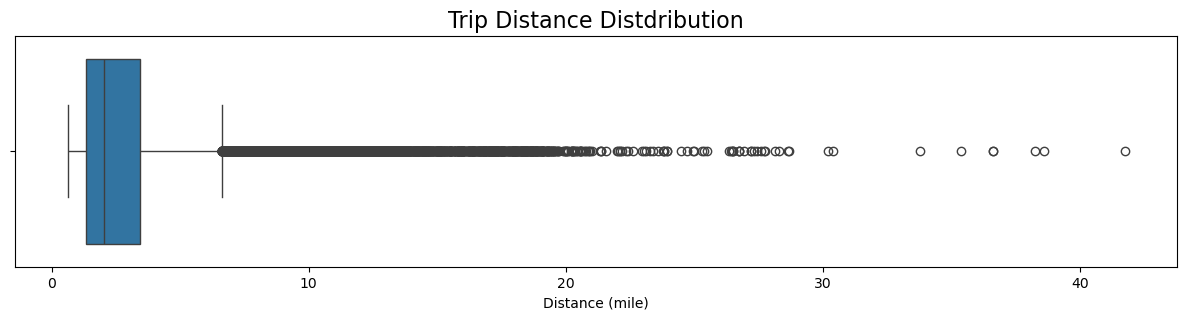

In [78]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=td, x='trip_distance', color=color[0])
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distdribution', fontsize=16)

plt.show()

- After handling for low and high extreme outliers, then we just handle the normal outliers on the plot by categorize the trip distance 

In [79]:
cat_of_distance = [0, 2, 6, 10, np.inf] 
labels_of_distance = ['<2 miles', '3-6 miles', '7-10 miles', '>10 miles']

td['distance_category'] = pd.cut(td['trip_distance'], bins=cat_of_distance, labels=labels_of_distance)

In [80]:
td['distance_category'].value_counts()

distance_category
<2 miles      29984
3-6 miles     24711
7-10 miles     4590
>10 miles      1543
Name: count, dtype: int64

#### Feature engineering - duration

Make new feature to make the analysist easier by adding trip duration

In [81]:
# adding duration of the trip
td['duration']= td['lpep_dropoff_datetime'] - td['lpep_pickup_datetime']
# convert it into minutes
td['duration']= td['duration'] / np.timedelta64(1,'m')

td['duration'] = td['duration'].round(2)

In [82]:
# show td duration sort by minimum values
td[['lpep_dropoff_datetime', 'lpep_pickup_datetime', 'trip_distance', 'duration']].sort_values('duration', ascending=True).head(10)

,lpep_dropoff_datetime,lpep_pickup_datetime,trip_distance,duration
7159,2023-01-05 07:54:34,2023-01-05 07:54:34,1.90,0.00
20214,2023-01-11 12:06:51,2023-01-11 12:06:50,0.70,0.02
11688,2023-01-07 01:29:53,2023-01-07 01:29:51,0.79,0.03
28626,2023-01-15 03:28:17,2023-01-15 03:28:15,1.30,0.03
3128,2023-01-03 09:10:18,2023-01-03 09:10:16,6.50,0.03
53526,2023-01-26 20:39:41,2023-01-26 20:39:38,6.98,0.05
47587,2023-01-24 14:24:45,2023-01-24 14:24:42,5.83,0.05
62987,2023-01-31 16:21:55,2023-01-31 16:21:52,3.69,0.05
57914,2023-01-28 22:12:58,2023-01-28 22:12:54,6.48,0.07
45120,2023-01-23 12:25:39,2023-01-23 12:25:35,1.40,0.07


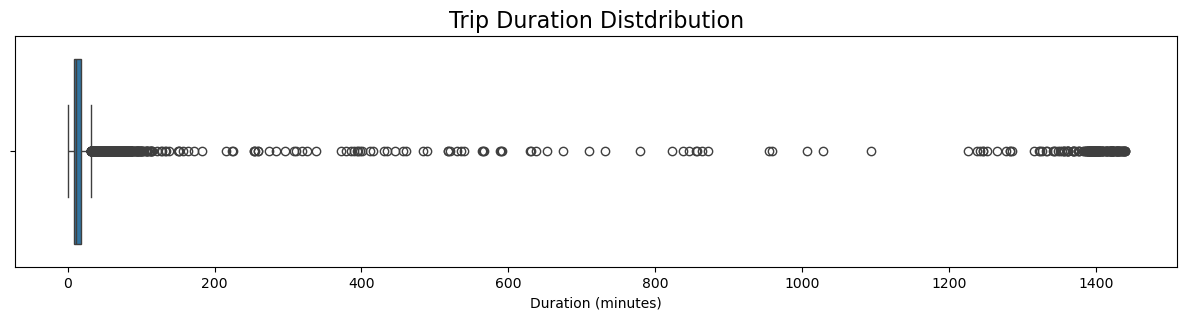

In [83]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=td, x='duration', color=color[0])
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distdribution', fontsize=16)


plt.show()

- The table and plot above showed there are low outliers which is duration within 1-2 minutes only

- With the possibility that taxis that travel less than 2 minutes are unnatural records or failed records such as the possibility of passengers or drivers canceling orders, datasets that have these values will be dropped.


- With the longest distance of 41.74 miles, if traveled at the lowest average speed in New York City of 10 mph, the time required is 4.17 hours or about 250 minutes. So it can be assumed that the duration of more than 250 minutes is an extreme outliers record.

In [84]:
print('Total ouliers (duration < 2 minutes):', len(td[td['duration']<=2]))

print('Total ouliers (duration > 250 minutes):', len(td[td['duration']>250]))

duration_outliers= td[(td['duration']<3) | (td['duration']>250)]

print('Total Outliers: ', len(duration_outliers))
duration_outliers.head(5)

Total ouliers (duration < 2 minutes): 130
Total ouliers (duration > 250 minutes): 225
Total Outliers:  659


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,time_zone,day_type,distance_category,duration
35,2023-01-01 00:41:53,2023-01-01 00:41:58,Standard rate,83,83,1.0,6.70,3.0,0.0,3.0,1.0,Queens,Elmhurst/Maspeth,Queens,Elmhurst/Maspeth,Late Night,Weekend,7-10 miles,0.08
49,2023-01-01 00:23:04,2023-01-01 23:18:32,Standard rate,255,48,1.0,8.55,47.8,5.3,1.0,1.0,Brooklyn,Williamsburg (North Side),Manhattan,Clinton East,Late Night,Weekend,7-10 miles,1375.47
108,2023-01-01 01:53:59,2023-01-02 00:00:00,Standard rate,260,223,1.0,2.64,14.9,0.0,1.0,1.0,Queens,Woodside,Queens,Steinway,Late Night,Weekend,3-6 miles,1326.02
118,2023-01-01 01:25:46,2023-01-02 00:29:15,Standard rate,129,37,1.0,6.53,31.0,0.0,2.0,1.0,Queens,Jackson Heights,Brooklyn,Bushwick South,Late Night,Weekend,7-10 miles,1383.48
158,2023-01-01 02:35:24,2023-01-01 02:38:09,Standard rate,41,166,1.0,0.64,5.1,0.0,2.0,1.0,Manhattan,Central Harlem,Manhattan,Morningside Heights,Late Night,Weekend,<2 miles,2.75


- Just like the previous distance feature, we will try to change the extreme outliers data with the central tendency (median) value of trip_duration for each departure and stop point on the existing records in the dataset.

In [85]:
desc_duration_byid = td[(td['duration']>2) & (td['duration']<250)].groupby('trip_distance').agg(count=('distance_category', 'count'), 
                                                                                                 mean_duration=('duration', 'mean'), 
                                                                                                 median_duration=('duration', 'median')).reset_index()
desc_duration_byid.sample(5, random_state=3)

,trip_distance,count,mean_duration,median_duration
1432,16.40,2,53.510000,53.510
1201,12.86,4,45.690000,43.415
1262,13.69,3,42.733333,37.620
612,6.69,25,23.368400,21.420
592,6.49,12,23.820833,20.250


In [86]:
duration_byid = pd.merge(duration_outliers, desc_duration_byid, on=['trip_distance'], how='left')
duration_byid.drop(columns='count', axis=1, inplace=True)
duration_byid.index = duration_outliers.index

duration_byid.head()


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,time_zone,day_type,distance_category,duration,mean_duration,median_duration
35,2023-01-01 00:41:53,2023-01-01 00:41:58,Standard rate,83,83,1.0,6.70,3.0,0.0,3.0,1.0,Queens,Elmhurst/Maspeth,Queens,Elmhurst/Maspeth,Late Night,Weekend,7-10 miles,0.08,22.520278,20.00
49,2023-01-01 00:23:04,2023-01-01 23:18:32,Standard rate,255,48,1.0,8.55,47.8,5.3,1.0,1.0,Brooklyn,Williamsburg (North Side),Manhattan,Clinton East,Late Night,Weekend,7-10 miles,1375.47,24.650000,23.64
108,2023-01-01 01:53:59,2023-01-02 00:00:00,Standard rate,260,223,1.0,2.64,14.9,0.0,1.0,1.0,Queens,Woodside,Queens,Steinway,Late Night,Weekend,3-6 miles,1326.02,14.875165,14.55
118,2023-01-01 01:25:46,2023-01-02 00:29:15,Standard rate,129,37,1.0,6.53,31.0,0.0,2.0,1.0,Queens,Jackson Heights,Brooklyn,Bushwick South,Late Night,Weekend,7-10 miles,1383.48,27.276842,24.03
158,2023-01-01 02:35:24,2023-01-01 02:38:09,Standard rate,41,166,1.0,0.64,5.1,0.0,2.0,1.0,Manhattan,Central Harlem,Manhattan,Morningside Heights,Late Night,Weekend,<2 miles,2.75,5.681933,4.20


In [87]:

print('Result:')
td.loc[duration_outliers.index, 'duration'] = duration_byid['median_duration'].round(2)

td.loc[duration_outliers.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'duration']].head()

Result:


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,duration
35,83,83,2023-01-01 00:41:53,2023-01-01 00:41:58,20.00
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,23.64
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,14.55
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,24.03
158,41,166,2023-01-01 02:35:24,2023-01-01 02:38:09,4.20


In [88]:
td.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
payment_type             0
trip_type                0
PUBorough                0
PUZone                   0
DOBorough                0
DOZone                   0
time_zone                0
day_type                 0
distance_category        0
duration                 4
dtype: int64

- There are still 4 nan values on duration which also has nan values on borough data

- There is a NaN value that may be the same as the previous case where there are no same records in PULocation and DOLocationID for the trip_duration feature.

- Then fill the NaN value using the central tendency (median) with the same PUBorough and DOBorough feature references.

In [89]:
isna = td.loc[duration_outliers.index][td['duration'].isna()][['PUBorough', 'DOBorough', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'duration']]
print('Total NaN Value : ', len(isna))
isna

Total NaN Value :  4


,PUBorough,DOBorough,lpep_pickup_datetime,lpep_dropoff_datetime,duration
7731,Queens,Queens,2023-01-05 12:12:49,2023-01-05 19:53:49,NaN
8835,Manhattan,Queens,2023-01-05 19:46:23,2023-01-06 00:00:00,NaN
16175,Queens,Queens,2023-01-09 14:05:14,2023-01-09 18:18:55,NaN
45204,Manhattan,Bronx,2023-01-23 13:45:11,2023-01-23 23:36:42,NaN


In [90]:
desc_duration_byborough = td[td['duration']<250].groupby(['PUBorough', 'DOBorough']).agg(count=('distance_category', 'count'), 
                                                                                                 mean_duration=('duration', 'mean'), 
                                                                                                 median_duration=('duration', 'median')).reset_index()
desc_duration_byborough.sample(10, random_state=5)

,PUBorough,DOBorough,count,mean_duration,median_duration
18,Queens,Manhattan,903,26.868128,24.800
2,Bronx,Manhattan,254,20.559252,17.800
17,Queens,EWR,7,58.354286,55.330
19,Queens,Queens,14117,13.187634,11.050
20,Staten Island,Brooklyn,1,36.550000,36.550
21,Staten Island,Staten Island,8,13.088750,13.365
10,Manhattan,Bronx,1430,17.187175,15.550
5,Brooklyn,Brooklyn,6022,16.405771,13.920
1,Bronx,Brooklyn,6,40.591667,42.000
13,Manhattan,Manhattan,33840,12.417217,10.800


In [91]:
duration_byborough = pd.merge(isna, desc_duration_byborough, on=['PUBorough', 'DOBorough'], how='left')
duration_byborough.drop(columns='count', axis=1, inplace=True)
duration_byborough.index = isna.index
display(duration_byborough.head())

print('Result:')
td.loc[isna.index, 'duration'] = duration_byborough['median_duration'].round(2)
td.loc[isna.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'duration']].head()

,PUBorough,DOBorough,lpep_pickup_datetime,lpep_dropoff_datetime,duration,mean_duration,median_duration
7731,Queens,Queens,2023-01-05 12:12:49,2023-01-05 19:53:49,NaN,13.187634,11.05
8835,Manhattan,Queens,2023-01-05 19:46:23,2023-01-06 00:00:00,NaN,26.243698,22.13
16175,Queens,Queens,2023-01-09 14:05:14,2023-01-09 18:18:55,NaN,13.187634,11.05
45204,Manhattan,Bronx,2023-01-23 13:45:11,2023-01-23 23:36:42,NaN,17.187175,15.55


Result:


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,duration
7731,223,223,2023-01-05 12:12:49,2023-01-05 19:53:49,11.05
8835,75,95,2023-01-05 19:46:23,2023-01-06 00:00:00,22.13
16175,134,95,2023-01-09 14:05:14,2023-01-09 18:18:55,11.05
45204,244,248,2023-01-23 13:45:11,2023-01-23 23:36:42,15.55


In [92]:
td.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
payment_type             0
trip_type                0
PUBorough                0
PUZone                   0
DOBorough                0
DOZone                   0
time_zone                0
day_type                 0
distance_category        0
duration                 0
dtype: int64

In [93]:
td[(td['duration']<=2) | (td['duration']>250)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,time_zone,day_type,distance_category,duration


- When changing the time duration, it is also necessary to change the dropoff time for all entries that have been affected by the extreme outliers above.

In [94]:
td.loc[duration_outliers.index, 'lpep_dropoff_datetime'] = td['lpep_pickup_datetime'] + pd.to_timedelta((td['duration']), unit='m').dt.round('S')
td.loc[duration_outliers.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'duration']].head()

,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,duration
35,83,83,2023-01-01 00:41:53,2023-01-01 01:01:53,20.00
49,255,48,2023-01-01 00:23:04,2023-01-01 00:46:42,23.64
108,260,223,2023-01-01 01:53:59,2023-01-01 02:08:32,14.55
118,129,37,2023-01-01 01:25:46,2023-01-01 01:49:48,24.03
158,41,166,2023-01-01 02:35:24,2023-01-01 02:39:36,4.20


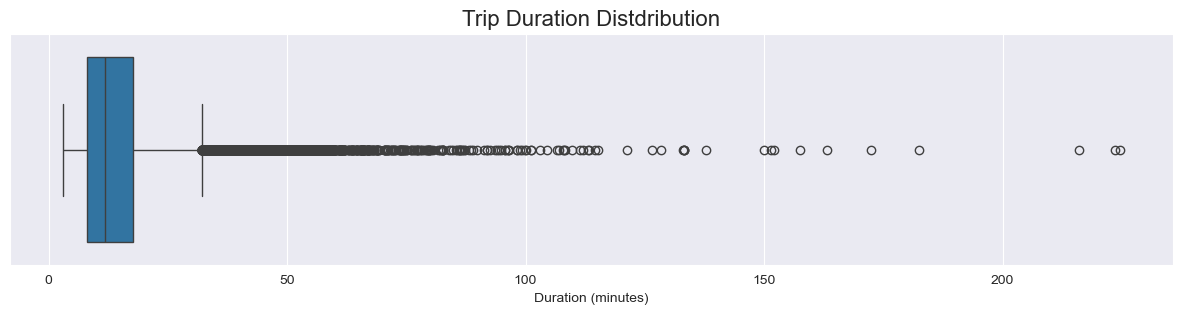

In [95]:
plt.figure(figsize=(15, 3))

sns.set_style("darkgrid")

sns.boxplot(data=td, x='duration', color=color[0])
plt.xlabel('Duration (minutes)')
plt.title('Trip Duration Distdribution', fontsize=16)

plt.show()

- After we remove all extreme outliers, we handle usual outliers by categorize the duration

In [96]:
cat_of_duration = [0, 5, 15, 30, np.inf] 
labels_of_duration = ['<5 minutes', '5-15 minutes', '15-30 minutes', '>30 minutes']

td['duration_category'] = pd.cut(td['duration'], bins=cat_of_duration, labels=labels_of_duration)

In [97]:
td['duration_category'].value_counts()

duration_category
5-15 minutes     36311
15-30 minutes    17060
<5 minutes        3821
>30 minutes       3636
Name: count, dtype: int64

#### Feature engineering - Speed

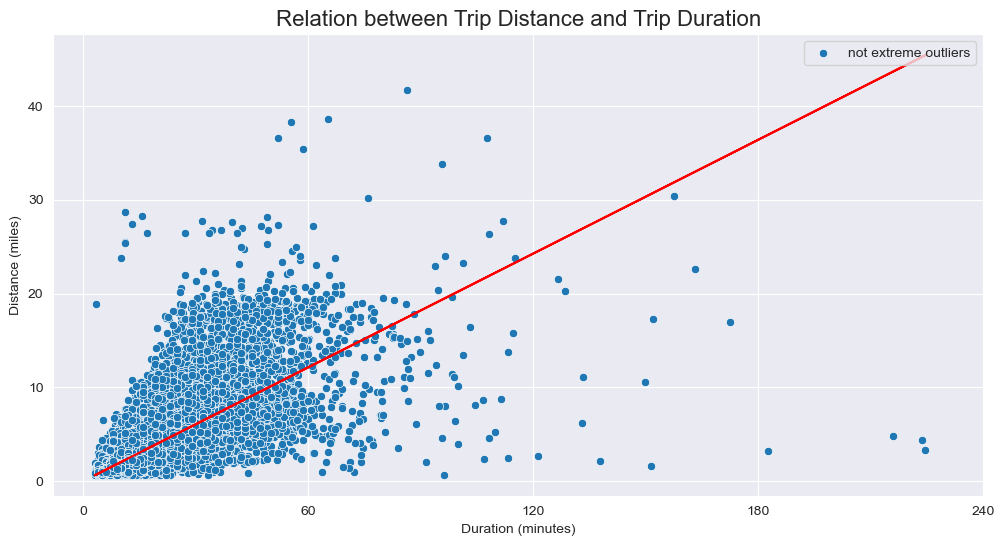

In [98]:
plt.figure(figsize=(12,6))

sns.scatterplot(td, x='duration', y='trip_distance', color=color[0], label='not extreme outliers')

x, y = td['duration'], td['trip_distance'] 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0, 241, 60))
plt.legend(loc ="upper right", prop={'size': 10})
plt.title('Relation between Trip Distance and Trip Duration', fontsize=16)
plt.show()

- From graphic above we seen that distance and duration has linear correlation which if the distance is getting big, so the duration is longer

- From here we can make new feature for speed (distance/time)

- We make the speed for mph (miles per hour) range, because our duration is still in minutes so we just have to convert it into hours

In [99]:
# Make new speed feature
td['speed'] = (td['trip_distance'] / (td['duration']/60)).round(2)

td[['trip_distance', 'duration', 'speed']].head(5)

,trip_distance,duration,speed
0,2.58,11.02,14.05
1,1.81,6.77,16.04
3,1.30,5.82,13.40
4,1.10,5.97,11.06
5,2.78,17.55,9.50


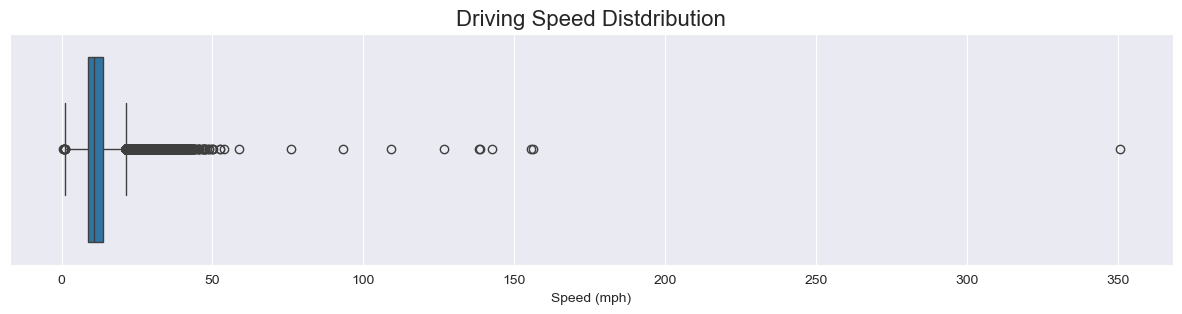

In [100]:
plt.figure(figsize=(15, 3))

sns.set_style("darkgrid")

sns.boxplot(data=td, x='speed', color=color[0])
plt.xlabel('Speed (mph)')
plt.title('Driving Speed Distdribution', fontsize=16)

plt.show()

- Based on the boxplot above, there are extreme outliers in this feature such as speeds that are more than 100 mph and less than 5 mph.

- Based on data from the New York City Taxi and Limousine Commission (TLC) for the period prior to 2021, average taxi speeds are often found to range from 10 to 14 mph.

- However, this speed can vary depending on traffic conditions, with the possibility of congestion, the lowest speed tolerance is greater than 5 mph.

- In New York, the maximum speed in the city is 25 mph while on the highway it is around 65 mph.

- With a tolerance of 5 mph, the highest speed tolerance maximum is 70 mph.

- Based from that analysis, we can handle the speed outliers

In [101]:
# Make speed outliers
speed_outliers = td[(td['speed']<5) | (td['speed']>70)][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'distance_category', 'duration', 'duration_category', 'speed']]

print('Total extreme outliers : ', len(speed_outliers))
speed_outliers.sort_values(by='speed', ascending=True).head()

Total extreme outliers :  895


,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,distance_category,duration,duration_category,speed
60667,2023-01-30 14:55:13,2023-01-30 16:31:28,0.64,<2 miles,96.25,>30 minutes,0.40
21587,2023-01-11 21:28:35,2023-01-12 00:00:00,1.63,<2 miles,151.42,>30 minutes,0.65
17029,2023-01-09 19:38:56,2023-01-09 20:51:12,1.03,<2 miles,72.27,>30 minutes,0.86
23872,2023-01-12 20:15:27,2023-01-13 00:00:00,3.32,3-6 miles,224.55,>30 minutes,0.89
23993,2023-01-12 21:42:06,2023-01-13 00:00:00,2.14,3-6 miles,137.90,>30 minutes,0.93


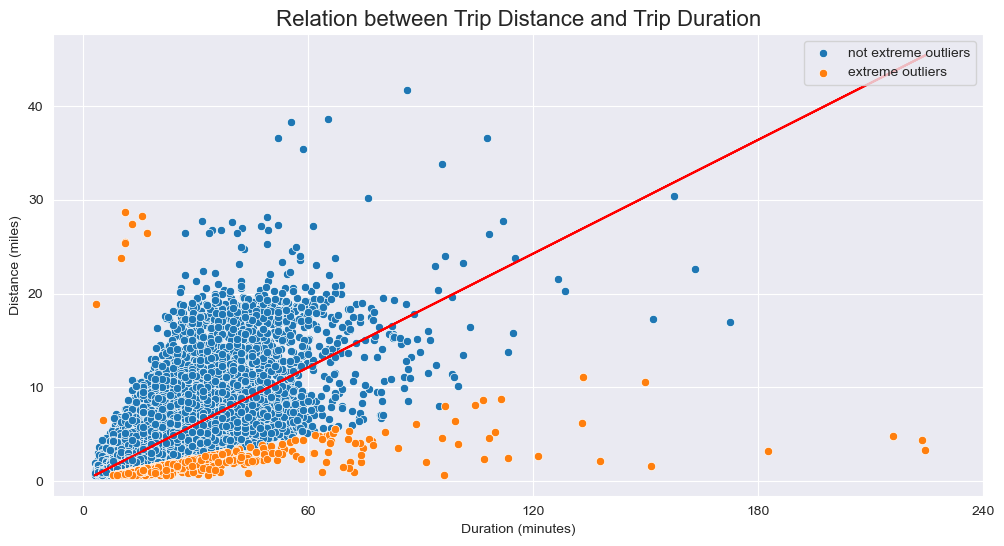

In [102]:
plt.figure(figsize=(12,6))

sns.scatterplot(td, x='duration', y='trip_distance', color=color[0], label='not extreme outliers')
sns.scatterplot(speed_outliers, x='duration', y='trip_distance', color=color[1], label='extreme outliers')

x, y = td['duration'], td['trip_distance'] 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0, 241, 60))
plt.legend(loc ="upper right", prop={'size': 10})
plt.title('Relation between Trip Distance and Trip Duration', fontsize=16)
plt.show()

- Blue scatter represents reasonable speed points between 5 - 70 miles per hour (mph).

- The orange scatter represents extreme outliers where the speed is below 5 mph or above 70 mph.

- We gonna handle this outliers like before it by using median value by distance

In [103]:
desc_speed = td.loc[~td.index.isin(speed_outliers.index)].groupby('distance_category').agg(count=('distance_category', 'count'), 
                                                                                              avg_speed=('speed', 'mean'), 
                                                                                              median_speed=('speed', 'median')).reset_index()
desc_speed

,distance_category,count,avg_speed,median_speed
0,<2 miles,29260,10.053318,9.640
1,3-6 miles,24561,12.523779,11.420
2,7-10 miles,4582,18.923147,18.055
3,>10 miles,1530,23.476471,22.355


- Merge outliers data with a new one

In [104]:
speed_bydistance= pd.merge(speed_outliers, desc_speed, on='distance_category', how='left')
speed_bydistance.index= speed_outliers.index

speed_bydistance.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,distance_category,duration,duration_category,speed,count,avg_speed,median_speed
545,2023-01-01 12:53:04,2023-01-01 14:10:09,4.26,3-6 miles,77.08,>30 minutes,3.32,24561,12.523779,11.42
648,2023-01-01 13:34:51,2023-01-01 13:59:58,1.86,<2 miles,25.12,15-30 minutes,4.44,29260,10.053318,9.64
769,2023-01-01 15:33:05,2023-01-01 16:03:34,1.15,<2 miles,30.48,>30 minutes,2.26,29260,10.053318,9.64
806,2023-01-01 16:22:27,2023-01-01 16:39:18,0.90,<2 miles,16.85,15-30 minutes,3.20,29260,10.053318,9.64
817,2023-01-01 16:28:55,2023-01-01 16:46:51,0.75,<2 miles,17.93,15-30 minutes,2.51,29260,10.053318,9.64


In [105]:
# Replace speed data
td.loc[speed_outliers.index, 'speed'] = speed_bydistance['median_speed'].round(2)

- Since the speed data is changed, other data that is still correlated must be adjusted with this speed data.

- Data that correlates with speed is distance and duration, so adjustments need to be made where the duration and distance traveled are in accordance with the speed being run.

- In addition, related to duration is the pickup and dropoff time which must also be adjusted if the duration changes.

In [106]:
# put correct duration formula
time_duration = (td['trip_distance'] / td['speed']) * 60
# Replace with a new data
td.loc[speed_outliers.index, 'duration'] = time_duration.round(2)
td.loc[speed_outliers.index, 'duration_category'] = pd.cut(td['duration'], bins=cat_of_duration, labels=labels_of_duration)

# fixing the time
td.loc[speed_outliers.index, 'lpep_dropoff_datetime'] = td['lpep_pickup_datetime'] + pd.to_timedelta((td['duration']), unit='m').dt.round('S')

In [107]:
# Show data
td.loc[speed_outliers.index][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'distance_category', 'duration', 'duration_category', 'speed']].head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,distance_category,duration,duration_category,speed
545,2023-01-01 12:53:04,2023-01-01 13:15:27,4.26,3-6 miles,22.38,15-30 minutes,11.42
648,2023-01-01 13:34:51,2023-01-01 13:46:26,1.86,<2 miles,11.58,5-15 minutes,9.64
769,2023-01-01 15:33:05,2023-01-01 15:40:15,1.15,<2 miles,7.16,5-15 minutes,9.64
806,2023-01-01 16:22:27,2023-01-01 16:28:03,0.90,<2 miles,5.60,5-15 minutes,9.64
817,2023-01-01 16:28:55,2023-01-01 16:33:35,0.75,<2 miles,4.67,<5 minutes,9.64


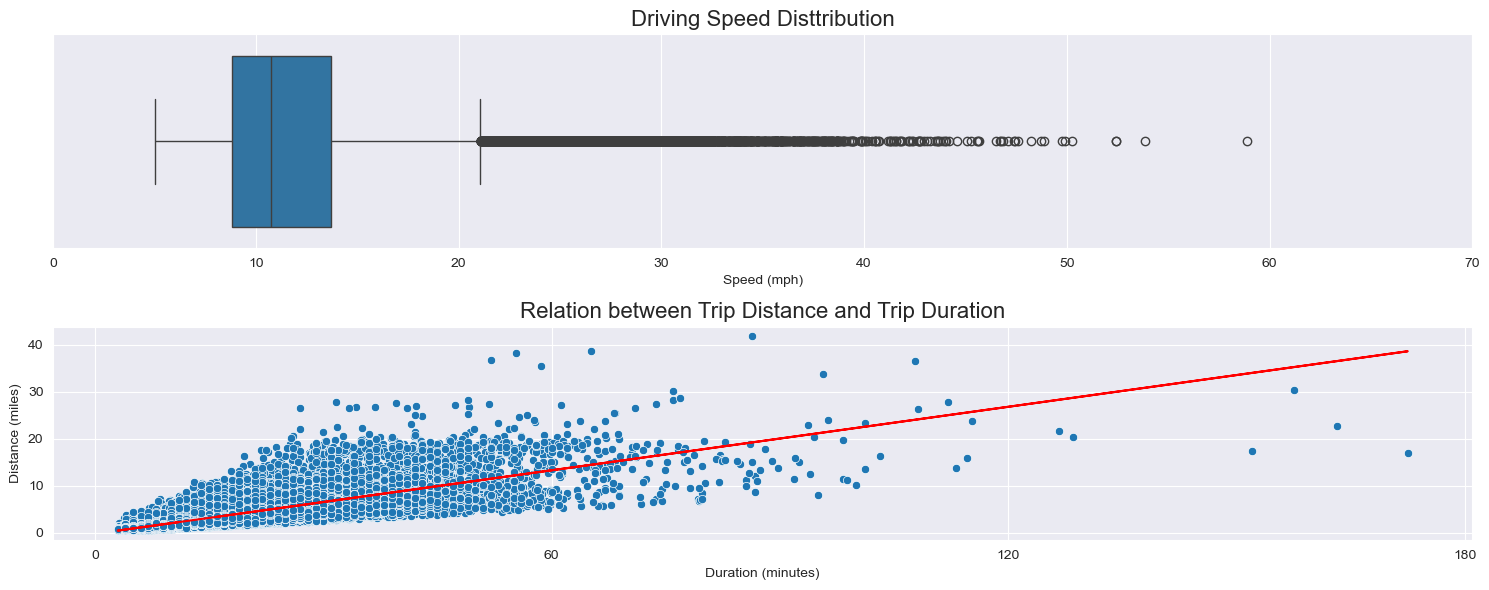

In [108]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
sns.boxplot(data=td, x='speed', color=color[0])
plt.xlabel('Speed (mph)')
plt.xticks(np.arange(0, 71, 10))
plt.title('Driving Speed Disttribution', fontsize=16)

plt.subplot(2, 1, 2)
sns.scatterplot(td, x='duration', y='trip_distance', color=color[0])
plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0, 181, 60))
plt.title('Relation between Trip Distance and Trip Duration', fontsize=16)

x, y = td['duration'], td['trip_distance'] 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')


plt.tight_layout()
plt.show()

- After handling for extreme outliers, we handling for other outliers by categorize the speed

In [109]:
cat_of_speed = [0, 10, 20, 30, np.inf]
labels_of_speed = ['<10 mph', '11-20 mph', '21-30 mph', '>30 mph']
td['speed_category'] = pd.cut(td['speed'], bins=cat_of_speed, labels=labels_of_speed)

In [110]:
td['speed_category'].value_counts()

speed_category
11-20 mph    30784
<10 mph      25288
21-30 mph     4051
>30 mph        705
Name: count, dtype: int64

### Amount

#### Fare Amount

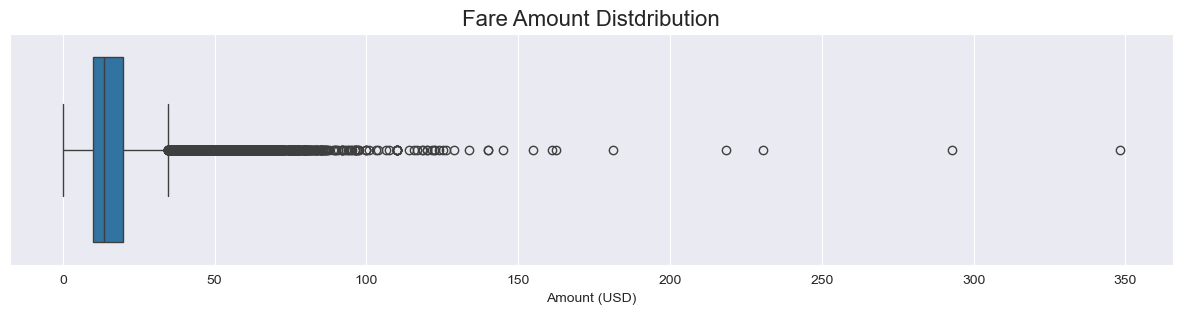

In [111]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=td, x='fare_amount', color=color[0])
plt.xlabel('Amount (USD)')
plt.title('Fare Amount Distdribution', fontsize=16)

plt.show()

- To identify outliers on fare amount we can check correlation on fare amount with distance which has strong correlation in beginning

In [112]:
# Show correlation value between trip type and RatecodeID
print("Correlation: ", td['trip_distance'].corr(td['fare_amount']))

Correlation:  0.9215921861302006


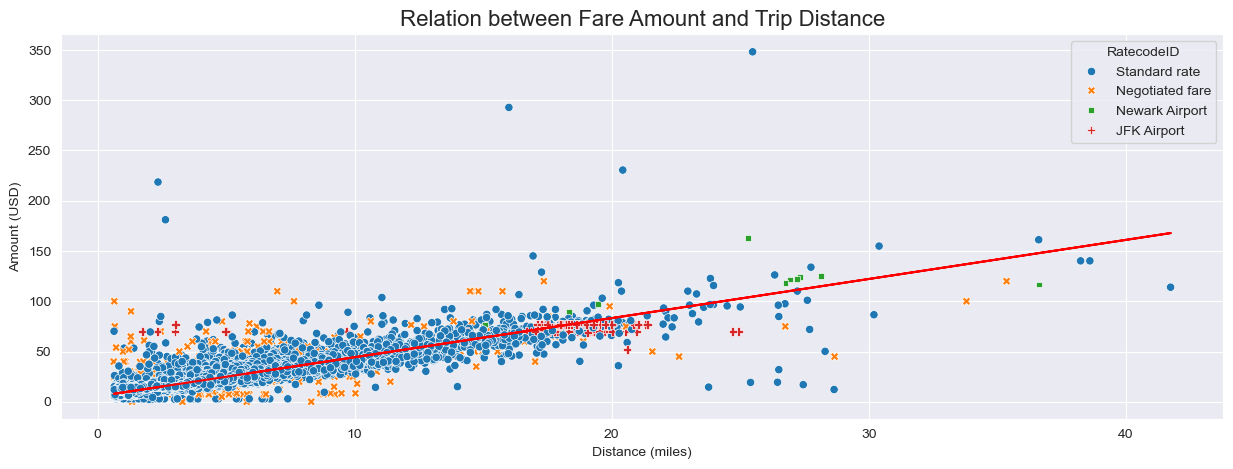

In [113]:
plt.figure(figsize=(15, 5))

sns.scatterplot(td, x='trip_distance', y='fare_amount',  hue='RatecodeID', style='RatecodeID')
plt.xlabel('Distance (miles)')
plt.ylabel('Amount (USD)')
plt.title('Relation between Fare Amount and Trip Distance', fontsize=16)

x, y = td['trip_distance'], td['fare_amount'] 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()

- The relationship between Fare amount and distance generally has a linear relationship where when the distance gets longer, the fare amount also gets higher.

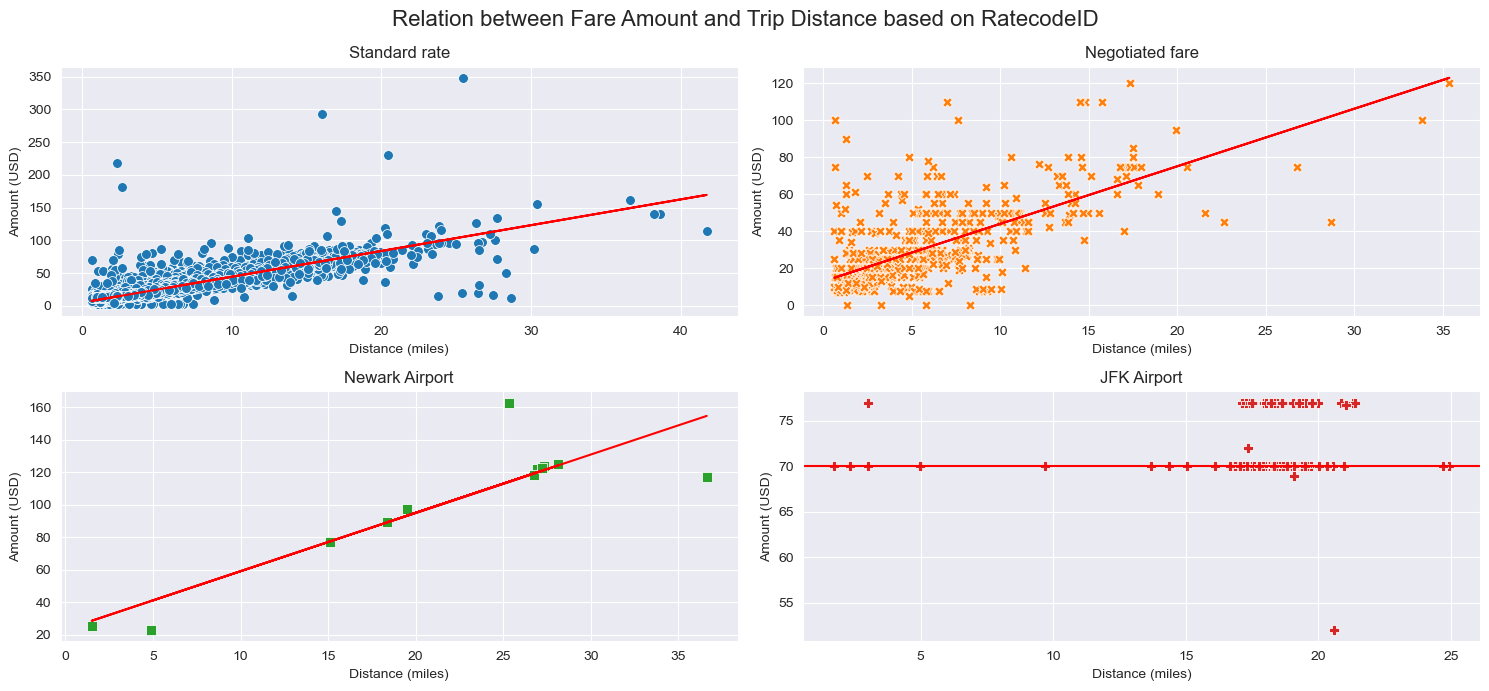

In [114]:
plt.figure(figsize=(15, 7))
plt.suptitle('Relation between Fare Amount and Trip Distance based on RatecodeID', fontsize=16)

markers=['o','X','s','P']
for i, val in enumerate(td['RatecodeID'].unique()):
    subset = td[td['RatecodeID'] == val]
    x = subset['trip_distance']
    y = subset['fare_amount']

    plt.subplot(2,2,i+1)
    sns.scatterplot(x=x, y=y,  color=color[i], marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')
    if val == 'JFK Airport':
        plt.axhline(y=70, color='red') 
        continue
    else:
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, color='red')
    
plt.tight_layout()
plt.show()

- The `'Standard Rate'` fare category, the relationship between distance and fare amount is linear, where if the distance traveled is longer then the fare amount is also more expensive (increases) but there are some outliers that are far from the linear line.

- Likewise, in the `'Negotiated Fare'` fare category, the relationship between distance and fare amount is linear, but in this category the scatter plot is more irregular than the ``standard rate'`. This is normal since this category allows for fare negotiation, but still if the negotiated value is far from the typical offer it will be considered as outliers.

- The fare category `'JFK Airport'` the relationship between distance and fare amount does not have a linear relationship because fares to and from JFK Airport have an initial flat fare of 70 USD. There are outliers where the fare is below 70 USD.

- The fare category `'Newark Airport'` also has a linear relationship between the distance feature and the fare amount, because there is little data so there are also only a few outliers.

In [115]:
outliers = pd.DataFrame()

mask_sr_1 = (td['RatecodeID']=='Standard rate') & (td['fare_amount']>120) & (td['trip_distance']<20)
mask_sr_2 = (td['RatecodeID']=='Standard rate') & (td['fare_amount']<60) & (td['trip_distance']>20)
mask_sr_3 = (td['RatecodeID']=='Standard rate') & (td['fare_amount']>150) & (td['trip_distance']<30)
sr_outlier = td[mask_sr_1 | mask_sr_2 | mask_sr_3]
outliers = pd.concat([outliers, sr_outlier])

mask_nf_1 = (td['RatecodeID']=='Negotiated fare') & (td['fare_amount']>99) & (td['trip_distance']<20)
mask_nf_2 = (td['RatecodeID']=='Negotiated fare') & (td['fare_amount']<5) & (td['trip_distance']<10)
mask_nf_3 = (td['RatecodeID']=='Negotiated fare') & (td['fare_amount']<60) & (td['trip_distance']>20)
mask_nf_4 = (td['RatecodeID']=='Negotiated fare') & (td['fare_amount']>60) & (td['trip_distance']<10)
nf_outlier = td[mask_nf_1 | mask_nf_2 | mask_nf_3 | mask_nf_4]
outliers = pd.concat([outliers, nf_outlier])

mask_jfk = (td['RatecodeID']=='JFK Airport') & (td['fare_amount']<70)
jfk_outlier = td[mask_jfk]
outliers = pd.concat([outliers, jfk_outlier])

mask_ewr = (td['RatecodeID']=='Newark Airport') & (td['fare_amount']>160)
ewr_outlier = td[mask_ewr]
outliers = pd.concat([outliers, ewr_outlier])

print('Total standard rate outlier:',len(sr_outlier))
print('Total negotiated rate outlier:',len(nf_outlier))
print('Total JFK airport outlier:',len(jfk_outlier))
print('Total Newark airport outlier:',len(ewr_outlier))
print('Total seluruh outlier:',len(outliers))

outliers = outliers[['RatecodeID', 'distance_category', 'fare_amount']]

outliers.head()

Total standard rate outlier: 16
Total negotiated rate outlier: 28
Total JFK airport outlier: 2
Total Newark airport outlier: 1
Total seluruh outlier: 47


,RatecodeID,distance_category,fare_amount
556,Standard rate,>10 miles,292.8
2014,Standard rate,3-6 miles,218.6
7731,Standard rate,>10 miles,348.1
10393,Standard rate,>10 miles,59.0
12615,Standard rate,>10 miles,230.5


- We change the extreme value with median values based by distance and RatecodeID

In [116]:
desc_amount = td[~td.index.isin(outliers.index)].groupby(['RatecodeID', 'distance_category']).agg(count=('fare_amount', 'count'), 
                                                                                                  avg_fare=('fare_amount', 'mean'), 
                                                                                                  median_fare=('fare_amount', 'median')).reset_index()
desc_amount.head()

,RatecodeID,distance_category,count,avg_fare,median_fare
0,JFK Airport,<2 miles,1,70.000000,70.0
1,JFK Airport,3-6 miles,6,71.166667,70.0
2,JFK Airport,7-10 miles,1,70.000000,70.0
3,JFK Airport,>10 miles,142,71.885634,70.0
4,Negotiated fare,<2 miles,152,15.820329,12.0


In [117]:
# Merge the data
fare_bydistance = pd.merge(outliers, desc_amount, on=['RatecodeID', 'distance_category'], how='left')
fare_bydistance.drop(columns='count', inplace=True)
fare_bydistance.index = outliers.index

display(fare_bydistance.sample(5))

,RatecodeID,distance_category,fare_amount,avg_fare,median_fare
65683,Standard rate,3-6 miles,181.07,18.999287,17.7
32277,Negotiated fare,<2 miles,61.00,15.820329,12.0
42824,Negotiated fare,7-10 miles,70.00,33.776667,30.0
1968,Negotiated fare,>10 miles,110.00,57.417241,50.0
7806,Negotiated fare,>10 miles,110.00,57.417241,50.0


In [118]:
# Replace with new data
td.loc[outliers.index, 'fare_amount'] = fare_bydistance['median_fare']

display(td.loc[outliers.index][['RatecodeID', 'distance_category', 'fare_amount']].head())

,RatecodeID,distance_category,fare_amount
556,Standard rate,>10 miles,52.17
2014,Standard rate,3-6 miles,17.70
7731,Standard rate,>10 miles,52.17
10393,Standard rate,>10 miles,52.17
12615,Standard rate,>10 miles,52.17


- We can check the outliers again with scatter plot

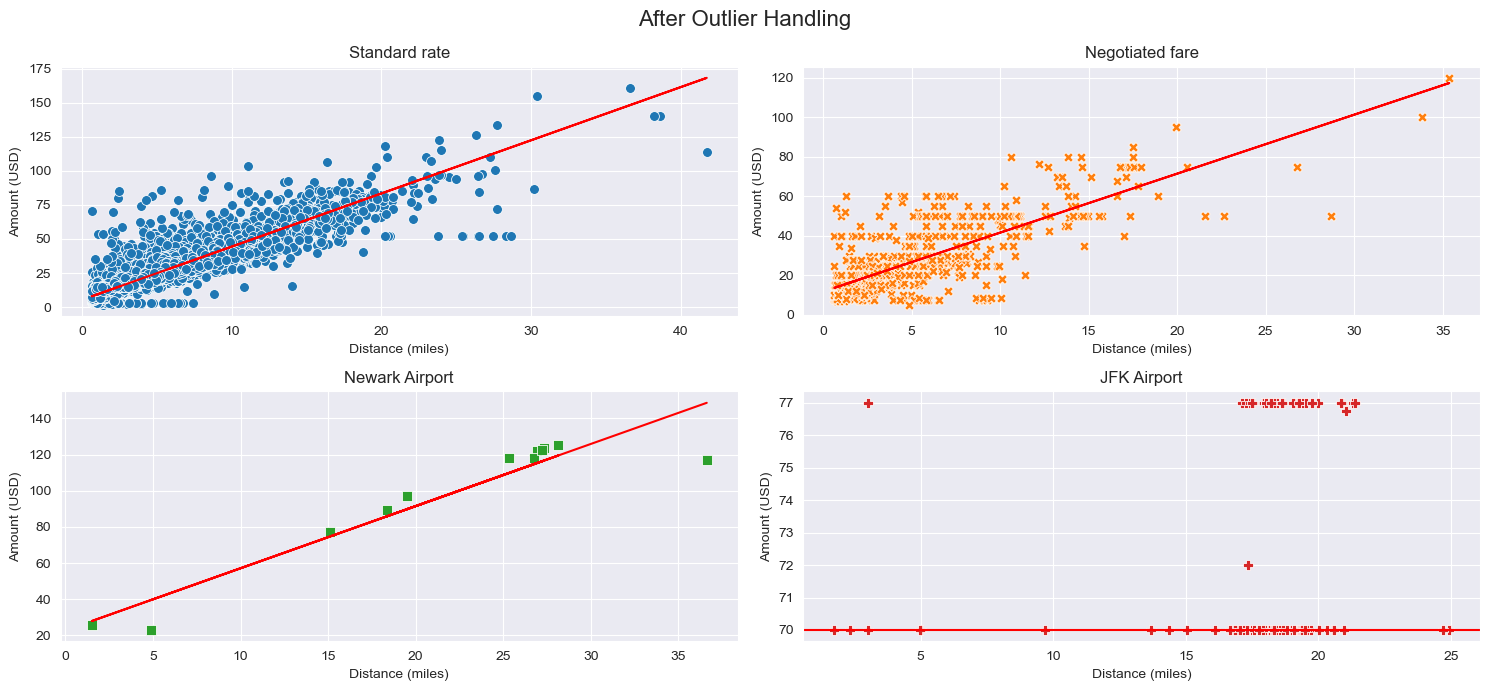

In [119]:
plt.figure(figsize=(15, 7))
plt.suptitle('After Outlier Handling', fontsize=16)

markers=['o','X','s','P']
for i, val in enumerate(td['RatecodeID'].unique()):
    subset = td[td['RatecodeID'] == val]
    x = subset['trip_distance']
    y = subset['fare_amount']

    plt.subplot(2,2,i+1)
    sns.scatterplot(x=x, y=y,  color=color[i], marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')
    if val == 'JFK Airport':
        plt.axhline(y=70, color='red') 
        continue
    else:
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, color='red')
    
plt.tight_layout()
plt.show()

- For other outliers we can categorize the fare amount

In [120]:
cat_fare = [0, 20, 40, 60, np.inf]
labels_fare = ['<20$', '21-40$', '41-60$', '>60$']
td['fare_category'] = pd.cut(td['fare_amount'], bins=cat_fare, labels=labels_fare)

In [121]:
td['fare_category'].value_counts()

fare_category
<20$      46093
21-40$    12280
41-60$     1855
>60$        600
Name: count, dtype: int64

#### Tip Amount

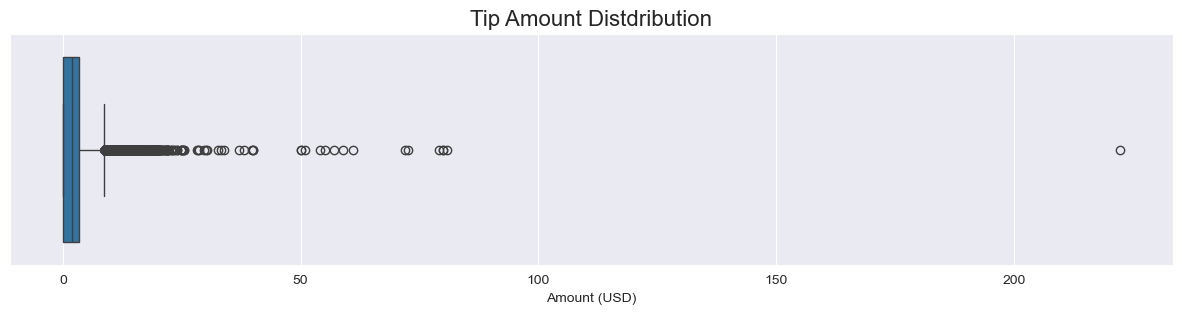

In [122]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=td, x='tip_amount', palette=color)
plt.xlabel('Amount (USD)')
plt.title('Tip Amount Distdribution', fontsize=16)

plt.show()

- To see outliers other than through graphs, we can see the tip amount from the distance and fare amount in each transaction.


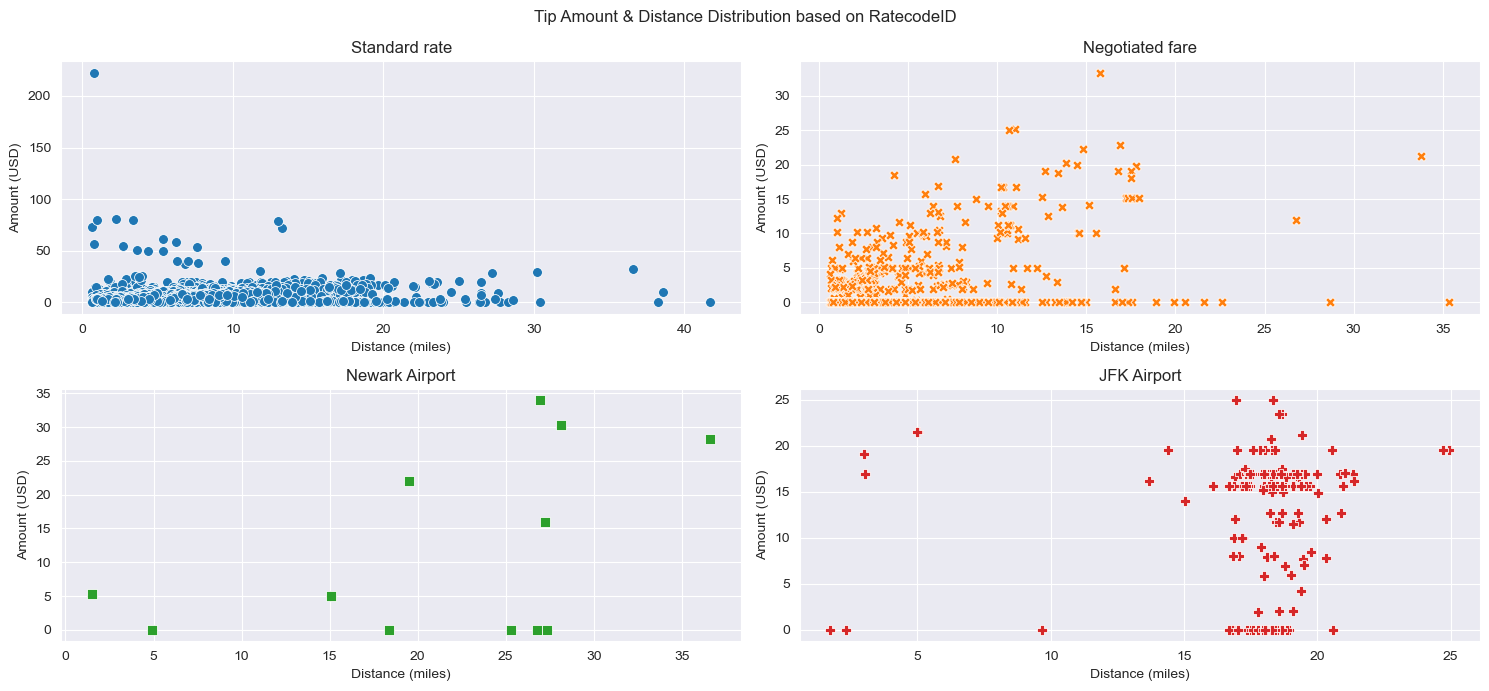

In [123]:
plt.figure(figsize=(15, 7))
plt.suptitle('Tip Amount & Distance Distribution based on RatecodeID')
markers=['o','X','s','P']
for i, val in enumerate(td['RatecodeID'].unique()):
    plt.subplot(2,2,i+1)
    sns.scatterplot( td[td['RatecodeID'] == val], x='trip_distance', y='tip_amount',  color=color[i], marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

- There is no relationship between distance and tip amount in all categories.

- The range of tip amount in the standard rate category is 0 to over 200, but since there is only one value over 200 and the one over 50 USD has a distance of less than 20 miles, this point is an extreme oulier. Therefore, the normal tip amount range is 0-50 USD.

- The tip amount range in the negotiated fare category is 0-35 USD.

- The tip amount range in the JFK airport category is 0-25 USD.

- The tip amount range in the Newark airport category is 0-35 USD.


In [124]:
# make tip outliers
tip_outliers = td[td['tip_amount']>50][['RatecodeID', 'distance_category', 'fare_category', 'tip_amount']]
tip_outliers

,RatecodeID,distance_category,fare_category,tip_amount
297,Standard rate,7-10 miles,21-40$,54.00
16464,Standard rate,3-6 miles,21-40$,80.00
19464,Standard rate,>10 miles,41-60$,72.00
20685,Standard rate,<2 miles,<20$,72.55
24979,Standard rate,3-6 miles,21-40$,61.00
31679,Standard rate,>10 miles,41-60$,79.00
32984,Standard rate,3-6 miles,21-40$,51.00
38664,Standard rate,3-6 miles,<20$,80.88
40892,Standard rate,<2 miles,<20$,80.00
44718,Standard rate,3-6 miles,<20$,55.05


- The extreme outliers can be handled and replaced again by median values by distance and fare amount

In [125]:
desc_tip = td[~td.index.isin(outliers.index)].groupby(['RatecodeID', 'distance_category', 'fare_category']).agg(count=('tip_amount', 'count'), 
                                                                                                                  avg_tip=('tip_amount', 'mean'), 
                                                                                                                  median_tip=('tip_amount', 'median')).reset_index()
desc_tip.head()

,RatecodeID,distance_category,fare_category,count,avg_tip,median_tip
0,JFK Airport,<2 miles,<20$,0,NaN,NaN
1,JFK Airport,<2 miles,21-40$,0,NaN,NaN
2,JFK Airport,<2 miles,41-60$,0,NaN,NaN
3,JFK Airport,<2 miles,>60$,1,0.0,0.0
4,JFK Airport,3-6 miles,<20$,0,NaN,NaN


In [126]:
# Merge the data
tip_bydistancefare = pd.merge(tip_outliers, desc_tip, on=['RatecodeID', 'distance_category', 'fare_category'], how='left')
tip_bydistancefare.drop(columns='count', inplace=True)
tip_bydistancefare.index = tip_outliers.index

display(tip_bydistancefare.sample(5))


,RatecodeID,distance_category,fare_category,tip_amount,avg_tip,median_tip
297,Standard rate,7-10 miles,21-40$,54.00,4.341806,5.0
20685,Standard rate,<2 miles,<20$,72.55,1.459217,1.5
57386,Standard rate,<2 miles,<20$,57.00,1.459217,1.5
31679,Standard rate,>10 miles,41-60$,79.00,5.732669,5.0
24979,Standard rate,3-6 miles,21-40$,61.00,3.190000,3.0


In [127]:
# Replace with new data
td.loc[tip_outliers.index, 'tip_amount'] = tip_bydistancefare['median_tip']
display(td.loc[tip_outliers.index][['RatecodeID', 'distance_category', 'fare_amount', 'tip_amount']])

,RatecodeID,distance_category,fare_amount,tip_amount
297,Standard rate,7-10 miles,33.8,5.00
16464,Standard rate,3-6 miles,26.1,3.00
19464,Standard rate,>10 miles,56.2,5.00
20685,Standard rate,<2 miles,8.6,1.50
24979,Standard rate,3-6 miles,26.8,3.00
31679,Standard rate,>10 miles,49.2,5.00
32984,Standard rate,3-6 miles,25.4,3.00
38664,Standard rate,3-6 miles,14.2,2.56
40892,Standard rate,<2 miles,7.2,1.50
44718,Standard rate,3-6 miles,17.7,2.56


- We check the extreme outliers again with scatter plot

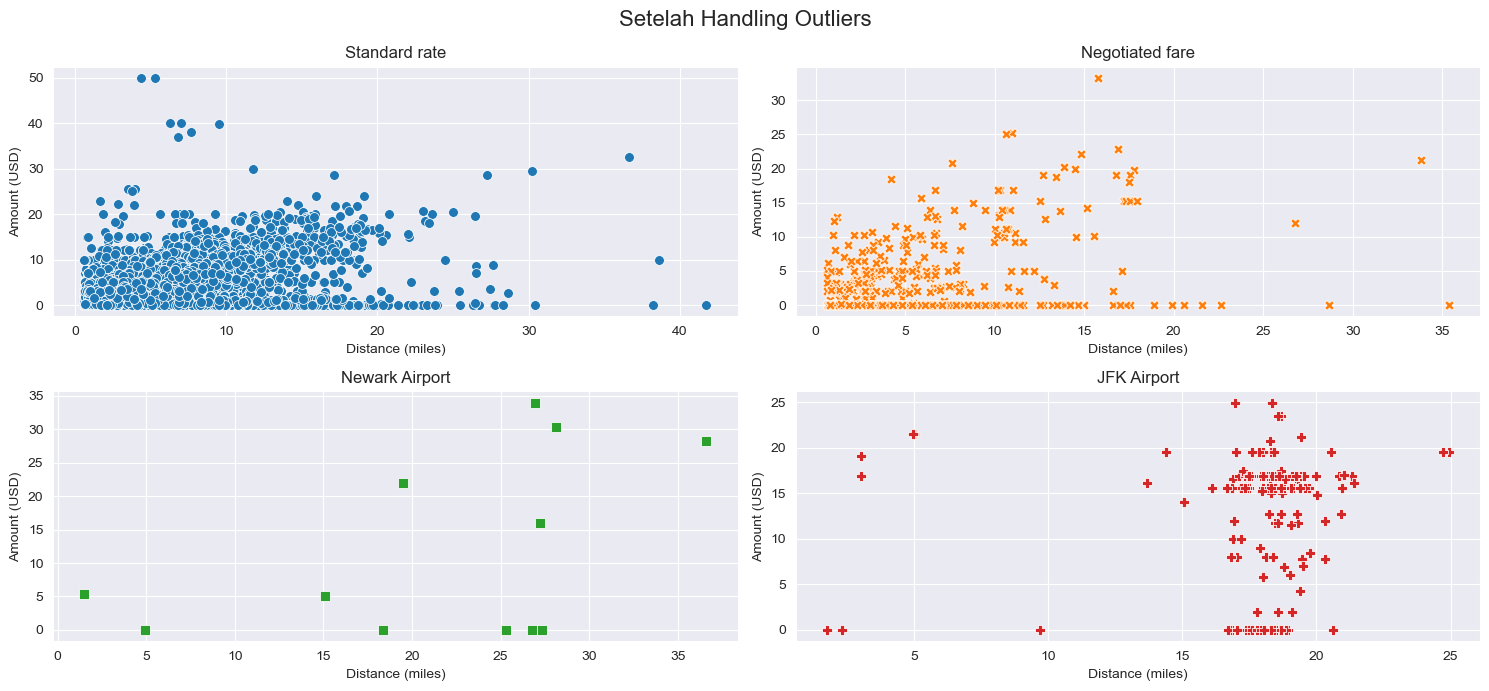

In [128]:
plt.figure(figsize=(15, 7))
plt.suptitle('Setelah Handling Outliers', fontsize=16)

markers=['o','X','s','P']

for i, val in enumerate(td['RatecodeID'].unique()):
    plt.subplot(2,2,i+1)
    sns.scatterplot( td[td['RatecodeID'] == val], x='trip_distance', y='tip_amount',  color=color[i], marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

- We handle the other outliers with categorize the tip amount

In [129]:
cat_tip = [-np.inf, 0, 5, 10, 15, np.inf]
labels_tip = ['0$', '1-5$', '6-10$', '11-15$', '>15$']
td['tip_category'] = pd.cut(td['tip_amount'], bins=cat_tip, labels=labels_tip)

In [130]:
td['tip_category'].value_counts()

tip_category
1-5$      29852
0$        23777
6-10$      6192
11-15$      747
>15$        260
Name: count, dtype: int64

### Payment Types

In [131]:
td['payment_type'].value_counts()

payment_type
1.0    40318
2.0    19927
5.0      435
3.0      123
4.0       25
Name: count, dtype: int64

- We dont have anything to do for payment type so we just gonna change the value into real meaning so it will make it easier to read

In [132]:
td['payment_type']=td['payment_type'].replace({1:'Credit card', 2:'Cash', 3:'No charge', 4:'Dispute', 5:'Unknown', 6:'Voided trip'})
td['payment_type'].value_counts()

payment_type
Credit card    40318
Cash           19927
Unknown          435
No charge        123
Dispute           25
Name: count, dtype: int64

### Trip Type

In [133]:
td['trip_type'].value_counts()

trip_type
1.0    60255
2.0      573
Name: count, dtype: int64

- Same as payment type, we gonna change the trip type value into real meaning

In [134]:
td['trip_type']=td['trip_type'].replace({1:'Street-hail', 2:'Dispatch'})
td['trip_type'].value_counts()

trip_type
Street-hail    60255
Dispatch         573
Name: count, dtype: int64

# Cleaned Data

In [135]:
print('Total Raw Data: ', len(df))
print('Total Cleaned Data: ', len(td))

display(df.head(5), td.head(5))

Total Raw Data:  68211
Total Cleaned Data:  60828


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,time_zone,day_type,distance_category,duration,duration_category,speed,speed_category,fare_category,tip_category
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard rate,166,143,1.0,2.58,14.9,4.03,Credit card,Street-hail,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,Late Night,Weekend,3-6 miles,11.02,5-15 minutes,14.05,11-20 mph,<20$,1-5$
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard rate,24,43,1.0,1.81,10.7,2.64,Credit card,Street-hail,Manhattan,Bloomingdale,Manhattan,Central Park,Late Night,Weekend,<2 miles,6.77,5-15 minutes,16.04,11-20 mph,<20$,1-5$
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard rate,41,238,1.0,1.30,6.5,1.70,Credit card,Street-hail,Manhattan,Central Harlem,Manhattan,Upper West Side North,Late Night,Weekend,<2 miles,5.82,5-15 minutes,13.40,11-20 mph,<20$,1-5$
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard rate,41,74,1.0,1.10,6.0,0.00,Credit card,Street-hail,Manhattan,Central Harlem,Manhattan,East Harlem North,Late Night,Weekend,<2 miles,5.97,5-15 minutes,11.06,11-20 mph,<20$,0$
5,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard rate,41,262,1.0,2.78,17.7,0.00,Cash,Street-hail,Manhattan,Central Harlem,Manhattan,Yorkville East,Late Night,Weekend,3-6 miles,17.55,15-30 minutes,9.50,<10 mph,<20$,0$


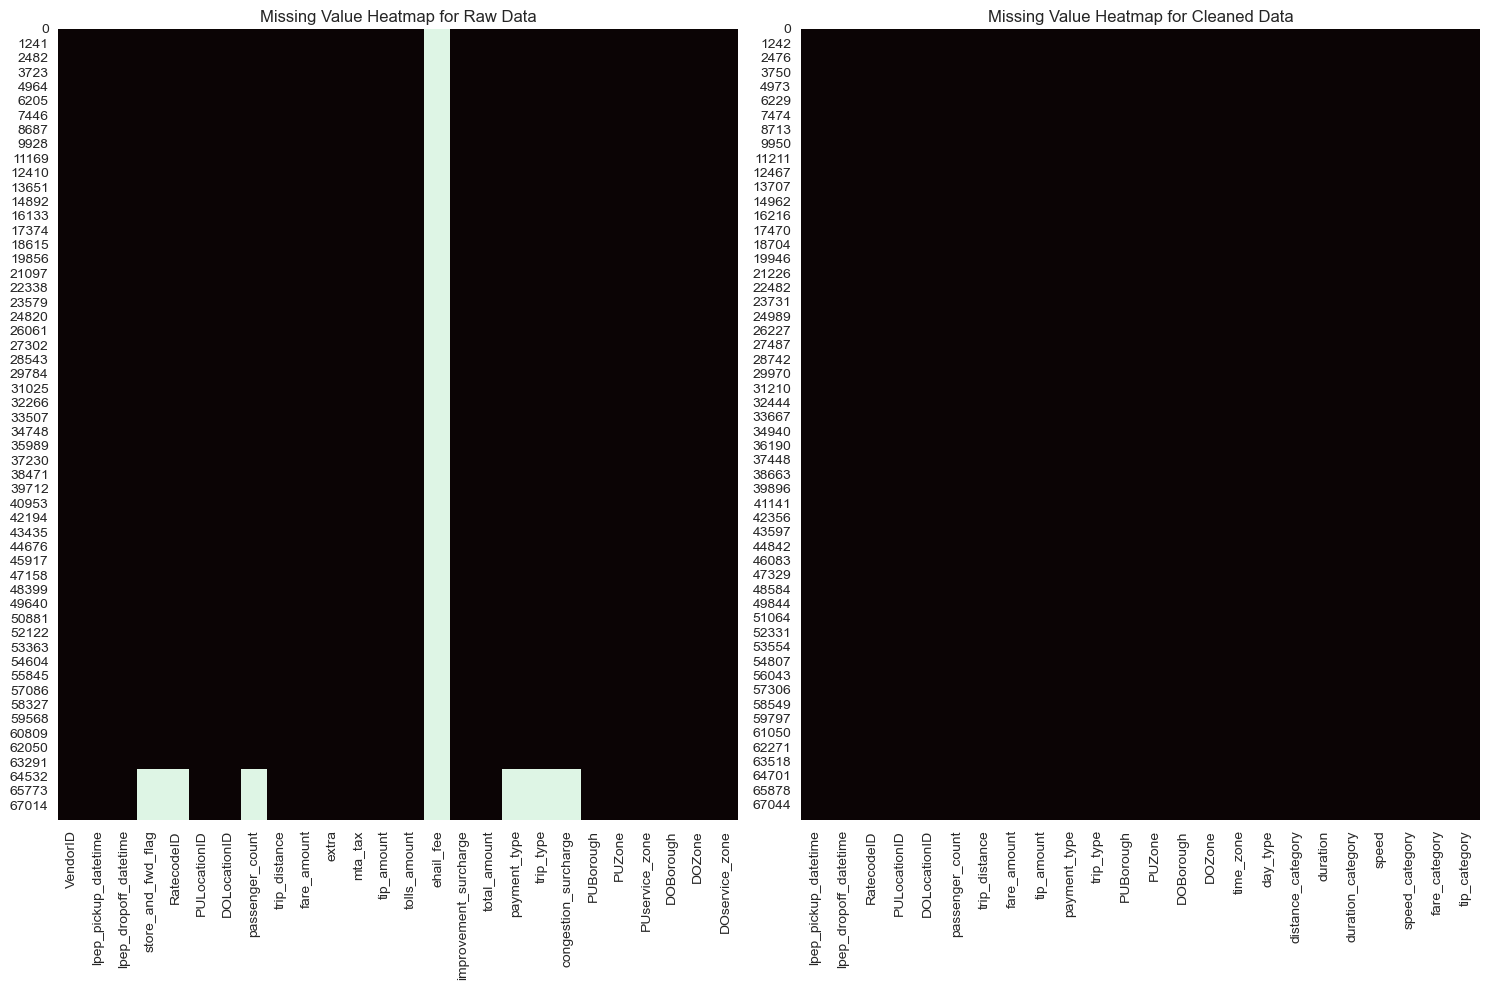

In [136]:

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

sns.heatmap(df.isna(), ax=axes[0], cmap=cmap, cbar=False)
axes[0].set_title('Missing Value Heatmap for Raw Data')

sns.heatmap(td.isna(), ax=axes[1], cmap=cmap, cbar=False)
axes[1].set_title('Missing Value Heatmap for Cleaned Data')

plt.tight_layout()
plt.show()


- The heatmap above is comparison between data before do the clean process and after it

### Saving temporary data into cleaned dataset

- Replace the df with temporary data

In [137]:
df= td.copy()

df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,time_zone,day_type,distance_category,duration,duration_category,speed,speed_category,fare_category,tip_category
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard rate,166,143,1.0,2.58,14.9,4.03,Credit card,Street-hail,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,Late Night,Weekend,3-6 miles,11.02,5-15 minutes,14.05,11-20 mph,<20$,1-5$
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard rate,24,43,1.0,1.81,10.7,2.64,Credit card,Street-hail,Manhattan,Bloomingdale,Manhattan,Central Park,Late Night,Weekend,<2 miles,6.77,5-15 minutes,16.04,11-20 mph,<20$,1-5$
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard rate,41,238,1.0,1.30,6.5,1.70,Credit card,Street-hail,Manhattan,Central Harlem,Manhattan,Upper West Side North,Late Night,Weekend,<2 miles,5.82,5-15 minutes,13.40,11-20 mph,<20$,1-5$
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard rate,41,74,1.0,1.10,6.0,0.00,Credit card,Street-hail,Manhattan,Central Harlem,Manhattan,East Harlem North,Late Night,Weekend,<2 miles,5.97,5-15 minutes,11.06,11-20 mph,<20$,0$
5,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard rate,41,262,1.0,2.78,17.7,0.00,Cash,Street-hail,Manhattan,Central Harlem,Manhattan,Yorkville East,Late Night,Weekend,3-6 miles,17.55,15-30 minutes,9.50,<10 mph,<20$,0$


- We save the cleaned dataset into csv, so we can proceed to visualize and analyse the data

In [138]:
# Save it into csv for python visualization
df.to_csv(("../data/clean_data/NYC_Trip_Data_Clean.csv"))

In [139]:
# Save it into xlxs for tableau
df.to_excel(("../data/clean_data/NYC_Trip_Data_Clean.xlsx"))